# Countries of the World and Population 2010 - 2019

https://www.kaggle.com/cityapiio/countries-population-2010-2020-data  
https://www.kaggle.com/fernandol/countries-of-the-world/version/1

<p style="align: left;"><img align=left src="http://abali.ru/wp-content/uploads/2013/03/shar_pokrytij_flagami_mira1.png"  width=330></p>

Country - Страна  
NativeName - Наименование страны "в оригинале"   
Code - Код страны  
Continent - Континент  
Region - Регион  
Area - Площадь (кв. км.)  
Pop2010-Pop2018 - Численность населения в период с 2010 по 2018 г.г.  
Population - Численность населения в 2019 г.  
Pop_Density - Плотность населения (человек на 1 км. кв.)  
GDP (USD per capita) - ВВП (Дол. США на душу населения)  
Literacy - Грамотность (%)  
Phones (per 1000) - Телефоны (на 1000 человек)  
Net_Migration - Чистая миграция  
Infant_Mortality - Младенческая смертность (на 1000 новорожденных)  
Birthrate - Уровень рождаемости  
Deathrate - Уровень смертности  
Coastline (coast / area ratio) - Береговая линия (отношение побережья к площади)   
Climate - Климат  
Arable (%) - Пахотные (%)  
Crops (%) - Посевы (%)  
Other (%) - Другие (%)  
Agriculture - Сельское хозяйство (%)    
Industry - Промышленность (%)   
Service - Услуги (%)  


In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 13,5
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df1 = pd.read_csv('countries_general_info_historical.24-10-2021.csv')
df1.drop(df1.columns[[2, 3, 5, 6]], axis=1, inplace=True)
df1.rename(columns = {
    df1.columns[0]: 'Country',
    df1.columns[2]: 'Code',
    df1.columns[3]: 'Pop2010',
    df1.columns[4]: 'Pop2011',
    df1.columns[5]: 'Pop2012',
    df1.columns[6]: 'Pop2013',
    df1.columns[7]: 'Pop2014',
    df1.columns[8]: 'Pop2015',
    df1.columns[9]: 'Pop2016',
    df1.columns[10]: 'Pop2017',
    df1.columns[11]: 'Pop2018',
    df1.columns[12]: 'Pop2019',
}, inplace = True)

df_round = round(df1.iloc[:, 3:] / 1000000, 3)

df2 = df1[['Country', 'NativeName', 'Code']].join(df_round, how='left')

df3 = pd.read_csv('population_2021.csv')

df4 = df2.merge(df3[['Country', 'Continent']], how='left', on='Country')
df4.loc[df4.Country.isin(['United Kingdom', 'Andorra', 'Monaco', 'San Marino', 'Liechtenstein', 'Moldova',\
                          'Kingdom of the Netherlands', 'Danish Realm']), 'Continent'] = 'Europe'
df4.loc[df4.Country.isin(["People's Republic of China", 'North Korea', 'Iran', 'Laos', 'Syria', 'Vietnam',\
                          'Brunei']), 'Continent'] = 'Asia'
df4.loc[df4.Country.isin(['Tuvalu', 'Palau', 'Nauru', 'Marshall Islands', 'Federated States of Micronesia']),\
                          'Continent'] = 'Oceania'
df4.loc[df4.Country.isin(['Saint Kitts and Nevis', 'Venezuela', 'Bolivia', 'The Bahamas', 'Dominica']),\
                          'Continent'] = 'South America'
df4.loc[df4.Country.isin(['Tanzania', 'Republic of the Congo', 'The Gambia', "Cote d'Ivoire", 'Cape Verde']),\
                          'Continent'] = 'Africa'
df4 = df4[['Country', 'NativeName', 'Code', 'Continent', 'Pop2010', 'Pop2011', 'Pop2012', 'Pop2013', 'Pop2014', 'Pop2015',\
           'Pop2016', 'Pop2017', 'Pop2018', 'Pop2019']]
df4.iloc[161, 6:14] = 3.2

df5 = pd.read_csv('countries of the world.csv')
df5.Country = df5.Country.apply(lambda x: x.strip())
df5['Country'] = df5['Country'].apply(lambda x: 'Danish Realm' if x == "Denmark" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Kingdom of the Netherlands' if x == "Netherlands" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Eswatini' if x == "Swaziland" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Sao Tome and Principe' if x == "Sao Tome & Principe" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'The Gambia' if x == "Gambia, The" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Democratic Republic of the Congo' if x == "Congo, Dem. Rep." else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Republic of the Congo' if x == "Congo, Repub. of the" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Central African Republic' if x == "Central African Rep." else x)
df5['Country'] = df5['Country'].apply(lambda x: 'South Korea' if x == "Korea, South" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Antigua and Barbuda' if x == "Antigua & Barbuda" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'The Bahamas' if x == "Bahamas, The" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Saint Kitts and Nevis' if x == "Saint Kitts & Nevis" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Trinidad and Tobago' if x == "Trinidad & Tobago" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Federated States of Micronesia' if x == "Micronesia, Fed. St." else x)
df5['Country'] = df5['Country'].apply(lambda x: 'North Korea' if x == "Korea, North" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Bosnia and Herzegovina' if x == "Bosnia & Herzegovina" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'North Macedonia' if x == "Macedonia" else x)
df5['Country'] = df5['Country'].apply(lambda x: "People's Republic of China" if x == "China" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'United States of America' if x == "United States" else x)

df6 = df4.merge(df5, how='left', on='Country')
df6.drop(df6.columns[[15, 17]], axis=1, inplace=True)
df6.rename(columns = {
    df6.columns[13]: 'Population',
    df6.columns[16]: 'Coastline',
    df6.columns[17]: 'Net_Migration',
    df6.columns[18]: 'Infant_Mortality',
    df6.columns[19]: 'GDP',
    df6.columns[20]: 'Literacy',
    df6.columns[21]: 'Phones',
    df6.columns[22]: 'Arable',
    df6.columns[23]: 'Crops',
    df6.columns[24]: 'Other',
}, inplace = True)

df6.loc[df6.Country.isin(['Timor-Leste', 'Myanmar']), 'Region'] = 'ASIA (EX. NEAR EAST)         '
df6.loc[df6.Country == 'Montenegro' , 'Region'] = 'EASTERN EUROPE                     '
df6.loc[df6.Country == 'South Sudan' , 'Region'] = 'SUB-SAHARAN AFRICA                 '
df6.Region = df6.Region.apply(lambda x: x.strip().lower().title())

df6.loc[df6.Country == 'Montenegro' , 'Area (sq. mi.)'] = 5333.0
df6.loc[df6.Country == 'Timor-Leste' , 'Area (sq. mi.)'] = 5794.0
df6.loc[df6.Country == 'South Sudan' , 'Area (sq. mi.)'] = 248777.0
df6.loc[df6.Country == 'Myanmar' , 'Area (sq. mi.)'] = 261228.0

df6['Area'] = round(df6['Area (sq. mi.)'] * 2.58999) # 1 кв. миля = 2,58999 кв км
#df6['Area'] = round(df6['Area'] / 1000000, 3)
#df6['Pop_Density'] = round(df6['Population'] / df6['Area'] * 1000000)
df6.loc[:, 'Pop_Density'] = round(df6['Population'] / df6['Area'] * 1000000)
df6.drop(df6.columns[[15]], axis=1, inplace=True)

df6['Region'] = df6['Region'].apply(lambda x: 'Asia' if x == "Asia (Ex. Near East)" else x)
df6['Net_Migration'] = df6['Net_Migration'].str.replace(',', '.').astype(float)
df6['Infant_Mortality'] = df6['Infant_Mortality'].str.replace(',', '.').astype(float)
df6['Birthrate'] = df6['Birthrate'].str.replace(',', '.').astype(float)
df6['Deathrate'] = df6['Deathrate'].str.replace(',', '.').astype(float)
df6['Literacy'] = df6['Literacy'].str.replace(',', '.').astype(float)
df6['Coastline'] = df6['Coastline'].str.replace(',', '.').astype(float)
df6['Phones'] = df6['Phones'].str.replace(',', '.').astype(float)
df6['Climate'] = df6['Climate'].str.replace(',', '.').astype(float)
df6['Arable'] = df6['Arable'].str.replace(',', '.').astype(float)
df6['Crops'] = df6['Crops'].str.replace(',', '.').astype(float)
df6['Other'] = df6['Other'].str.replace(',', '.').astype(float)
df6['Agriculture'] = df6['Agriculture'].str.replace(',', '.').astype(float)
df6['Industry'] = df6['Industry'].str.replace(',', '.').astype(float)
df6['Service'] = df6['Service'].str.replace(',', '.').astype(float)

df6['Arable'] = round(df6['Arable'], 1)
df6['Crops'] = round(df6['Crops'], 1)
df6['Other'] = round(df6['Other'], 1)
df6['Agriculture'] = round(df6['Agriculture'] * 100, 1)
df6['Industry'] = round(df6['Industry'] * 100, 1)
df6['Service'] = round(df6['Service'] * 100, 1)

full_df = df6[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area', 'Pop2010', 'Pop2011', 'Pop2012', 'Pop2013', \
               'Pop2014', 'Pop2015', 'Pop2016', 'Pop2017', 'Pop2018', 'Population', 'Pop_Density', 'GDP', 'Literacy', 'Phones', \
               'Net_Migration', 'Infant_Mortality', 'Birthrate', 'Deathrate', 'Coastline', 'Climate', 'Arable', 'Crops', 'Other', \
               'Agriculture', 'Industry', 'Service']]


full_df.head()

,Country,NativeName,Code,Continent,Region,Area,Pop2010,Pop2011,Pop2012,Pop2013,...,Birthrate,Deathrate,Coastline,Climate,Arable,Crops,Other,Agriculture,Industry,Service
0,Canada,Canada,CAN,North America,Northern America,25860195.0,34.005,34.339,34.714,35.083,...,10.78,7.80,2.02,NaN,5.0,0.0,95.0,2.2,29.4,68.4
1,Japan,日本,JPN,Asia,Asia,978589.0,128.070,127.833,127.629,127.445,...,9.37,9.16,7.87,3.0,12.2,1.0,86.8,1.7,25.8,72.5
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,838644.0,4.889,4.953,5.019,5.080,...,11.46,9.40,7.77,3.0,2.9,0.0,97.1,2.1,41.5,56.4
3,Ireland,Eire,IRL,Europe,Western Europe,182024.0,4.560,4.580,4.600,4.624,...,14.45,7.82,2.06,3.0,15.2,0.0,84.8,5.0,46.0,49.0
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,240947.0,10.000,9.972,9.920,9.893,...,9.72,13.11,0.00,3.0,50.1,2.1,47.8,3.7,31.2,65.1


In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           192 non-null    object 
 1   NativeName        192 non-null    object 
 2   Code              192 non-null    object 
 3   Continent         192 non-null    object 
 4   Region            192 non-null    object 
 5   Area              192 non-null    float64
 6   Pop2010           192 non-null    float64
 7   Pop2011           192 non-null    float64
 8   Pop2012           192 non-null    float64
 9   Pop2013           192 non-null    float64
 10  Pop2014           192 non-null    float64
 11  Pop2015           192 non-null    float64
 12  Pop2016           192 non-null    float64
 13  Pop2017           192 non-null    float64
 14  Pop2018           192 non-null    float64
 15  Population        192 non-null    float64
 16  Pop_Density       192 non-null    float64
 1

# Total

In [8]:
world = full_df[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area', 'Population', 'Pop_Density']]
world.head()

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density
0,Canada,Canada,CAN,North America,Northern America,25860195.0,37.593,1.0
1,Japan,日本,JPN,Asia,Asia,978589.0,126.265,129.0
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,838644.0,5.348,6.0
3,Ireland,Eire,IRL,Europe,Western Europe,182024.0,4.934,27.0
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,240947.0,9.771,41.0


In [9]:
total_world = pd.DataFrame([[f"{world.Country.count()} страны"],
                            [f"{round(world.Area.sum() / 1000000, 1)} млн. км. кв."],
                            [f"{round(world.Population.sum() / 1000, 1)} млрд. чел."],
                            [f"{round(world.Population.sum() / round(world.Area.sum() / 1000000, 3))} чел. на 1 км. кв."]],
                           index=['Количество стран в мире:', 'Общая площадь территорий всех стран мира:',\
                                  'Общая популяция мира:', 'Плотность населения мира:'],
                           columns=['Values'])
total_world

,Values
Количество стран в мире:,192 страны
Общая площадь территорий всех стран мира:,343.5 млн. км. кв.
Общая популяция мира:,7.6 млрд. чел.
Плотность населения мира:,22 чел. на 1 км. кв.


## 1. Площади территорий стран мира.

In [10]:
countries = full_df[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
countries.head()

,Country,NativeName,Code,Continent,Region,Area
0,Canada,Canada,CAN,North America,Northern America,25860195.0
1,Japan,日本,JPN,Asia,Asia,978589.0
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,838644.0
3,Ireland,Eire,IRL,Europe,Western Europe,182024.0
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,240947.0


In [11]:
# Распределение количества стран по континентам и площади континентов (млн. кв. км.)
areas_continents = countries.groupby('Continent').agg({'Country': 'count', 'Area': 'sum'}).reset_index()
areas_continents.Area = round(areas_continents.Area / 1000000, 1)
areas_continents['Areas_Parts_%'] = round(areas_continents['Area'] / areas_continents['Area'].sum() * 100, 1)
areas_continents.index = areas_continents.Continent
areas_continents.drop(areas_continents.columns[[0]], axis=1, inplace=True)
areas_continents = areas_continents.sort_values(by='Area', ascending=False)
#areas_continents.columns = ['Continent', 'Area_BlnSqrKm']
areas_continents

,Country,Area,Areas_Parts_%
Continent,,,
Asia,47,80.7,23.5
Africa,53,77.6,22.6
Europe,43,59.5,17.3
North America,20,57.8,16.8
South America,15,45.9,13.4
Oceania,14,22.0,6.4


Text(0.5, 1.0, 'Распределение количества стран и площадей территорий (млн. кв. км.) по континентам')

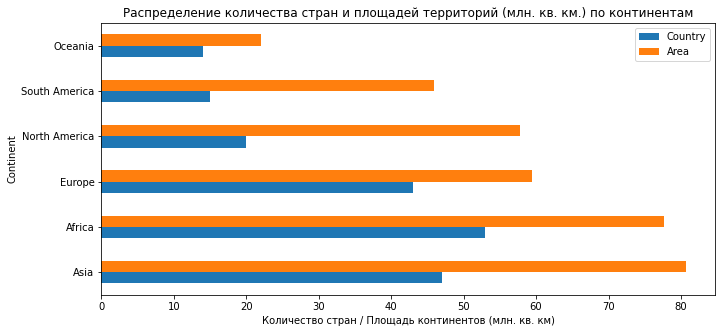

In [12]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
barh_areas_continents = areas_continents[['Country', 'Area']].plot(kind='barh', ax=ax, legend=True)
ax.set_xlabel('Количество стран / Площадь континентов (млн. кв. км)')
ax.set_title('Распределение количества стран и площадей территорий (млн. кв. км.) по континентам')

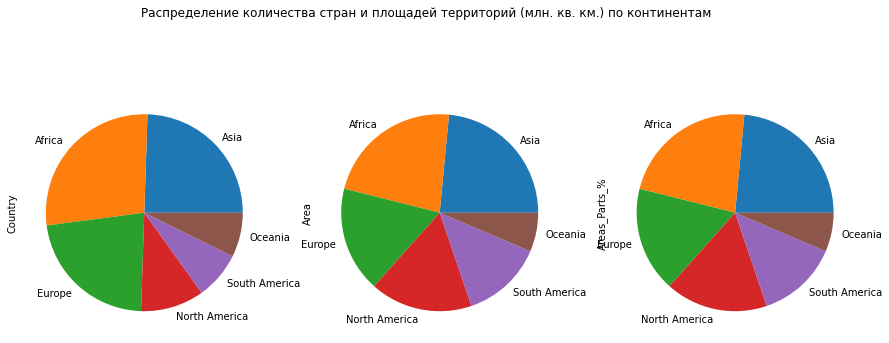

In [13]:
pies_pie_areas_continents = areas_continents.plot.pie(subplots=True, figsize=(15, 6),\
                                    title='Распределение количества стран и площадей территорий (млн. кв. км.) по континентам',\
                                    legend=False)

In [14]:
# Страна с максимальной площадью (млн. кв. км.)
area_max = countries.query('Area == {}'.format(countries['Area'].max()))\
           [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
area_max.Area = round(area_max.Area / 1000000, 1)
area_max

,Country,NativeName,Code,Continent,Region,Area
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,44.2


In [15]:
area_min = countries[countries.Area.transform(lambda x: x == x.min())].copy()
area_min.Area = area_min.Area / 1000000
area_min

,Country,NativeName,Code,Continent,Region,Area
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.000005


In [16]:
# Страна с минимальной площадью (млн. кв. км.)
area_min = countries.query('Area == {}'.format(countries['Area'].min()))\
           [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
area_min.Area = area_min.Area / 1000000
area_min

,Country,NativeName,Code,Continent,Region,Area
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.000005


In [17]:
# Страны с максимальными площадями на континентах (млн. кв. км.)
countries_max_area_continents = countries[countries.groupby('Continent').Area.transform(lambda x: x == x.max())]\
                                .sort_values('Continent')
countries_max_area_continents.Area = round(countries_max_area_continents.Area / 1000000, 1)
countries_max_area_continents

,Country,NativeName,Code,Continent,Region,Area
188,Sudan,جمهورية السودان,SDN,Africa,Sub-Saharan Africa,6.5
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,24.9
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,44.2
0,Canada,Canada,CAN,North America,Northern America,25.9
68,Australia,Australia,AUS,Oceania,Oceania,19.9
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,22.0


In [18]:
# Страны с минимальными площадями на континентах (млн. кв. км.)
countries_min_area_continents = countries[countries.groupby('Continent').Area.transform(lambda x: x == x.min())]\
                                .sort_values('Continent')
countries_min_area_continents.Area = round(countries_min_area_continents.Area / 1000000, 6)
countries_min_area_continents

,Country,NativeName,Code,Continent,Region,Area
185,Seychelles,Republique des Seychelles,SYC,Africa,Sub-Saharan Africa,0.001178
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,Asia,0.000777
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.000005
102,Grenada,Grenada,GRD,North America,Latin Amer. & Carib,0.000891
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.000054
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,Latin Amer. & Carib,0.000676


In [19]:
# TOP-5 стран с наибольшими территориями (млн. кв. км.)
top5_max_area = countries.sort_values(by='Area', ascending=False).head(5)\
                 [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
top5_max_area.Area = round(top5_max_area.Area / 1000000, 1)
top5_max_area

,Country,NativeName,Code,Continent,Region,Area
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,44.2
0,Canada,Canada,CAN,North America,Northern America,25.9
6,United States of America,United States of America,USA,North America,Northern America,24.9
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,24.9
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,22.0


In [20]:
# TOP-5 стран с наименьшими территориями (млн. кв. км.)
top5_min_area = countries.sort_values(by='Area', ascending=True).head(5)\
                 [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
top5_min_area.Area = round(top5_min_area.Area / 1000000, 6)
top5_min_area

,Country,NativeName,Code,Continent,Region,Area
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.000005
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.000054
77,Tuvalu,Tuvalu,TUV,Oceania,Oceania,0.000067
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,Western Europe,0.000158
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,0.000414


In [21]:
europe = countries.loc[countries.Continent.str.contains('Europe')]
africa = countries.loc[countries.Continent.str.contains('Africa')]
asia = countries.loc[countries.Continent.str.contains('Asia')]
north_america = countries.loc[countries.Continent.str.contains('North America')]
south_america = countries.loc[countries.Continent.str.contains('South America')]
oceania = countries.loc[countries.Continent.str.contains('Oceania')]

In [22]:
areas_three_continents = areas_continents.loc[areas_continents.index.isin(['Europe','Africa', 'Asia'])]
areas_three_continents

,Country,Area,Areas_Parts_%
Continent,,,
Asia,47,80.7,23.5
Africa,53,77.6,22.6
Europe,43,59.5,17.3


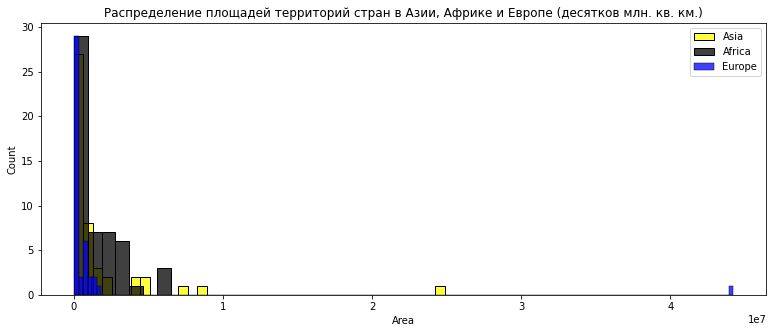

In [23]:
#fig = plt.figure(figsize=(15, 12))
sns.histplot(asia, x='Area', color='yellow')
sns.histplot(africa, x='Area', color='black')
sns.histplot(europe, x='Area', color='blue')
plt.title('Распределение площадей территорий стран в Азии, Африке и Европе (десятков млн. кв. км.)')
plt.legend(areas_three_continents.index.unique())

## 2. Популяция мира на 2019 г.

In [24]:
population = full_df[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Population']]
population.head()

,Country,NativeName,Code,Continent,Region,Population
0,Canada,Canada,CAN,North America,Northern America,37.593
1,Japan,日本,JPN,Asia,Asia,126.265
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,5.348
3,Ireland,Eire,IRL,Europe,Western Europe,4.934
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,9.771


In [25]:
# Страна с максимальной популяцией в 2019г. (млн. человек)
population_max = population.query('Population == {}'.format(population['Population'].max()))\
                 [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Population']]
population_max

,Country,NativeName,Code,Continent,Region,Population
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,1397.715


In [26]:
# Страна с минимальной популяцией в 2019г. (млн. человек)
population_min = population.query('Population == {}'.format(population['Population'].min()))\
                 [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Population']]
population_min

,Country,NativeName,Code,Continent,Region,Population
77,Tuvalu,Tuvalu,TUV,Oceania,Oceania,0.012


### Популяция континентов на 2019 г.

In [27]:
# Распределение населения Земли, на 2019г., по континентам (млн. человек)
distribution_population_continents = population.groupby('Continent').sum()['Population'].reset_index()\
                                               .sort_values('Population', ascending=False)
distribution_population_continents.columns = ['Continent', 'Population']
distribution_population_continents['Population_Parts_%'] = round(distribution_population_continents['Population'] /\
                                                                 distribution_population_continents['Population'].sum()* 100, 1)
distribution_population_continents

,Continent,Population,Population_Parts_%
1,Asia,4529.576,59.5
0,Africa,1291.376,17.0
2,Europe,744.367,9.8
3,North America,580.911,7.6
5,South America,427.578,5.6
4,Oceania,41.616,0.5


Text(0.5, 1.0, 'Distribution of population by continents (Распределение населения мира по континентам)')

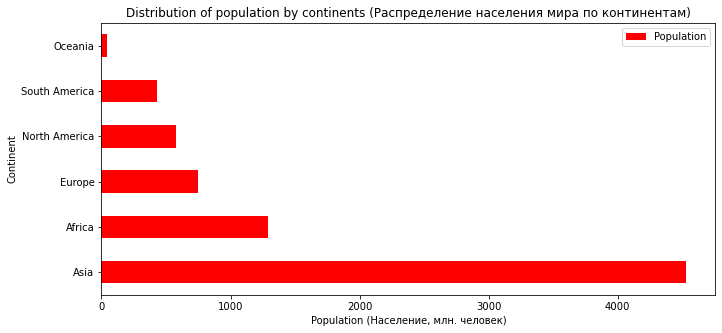

In [28]:
distribution_population_continents_barh = population[['Continent', 'Population']].groupby('Continent').sum()\
                                                                                 .sort_values('Population', ascending=False)
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
distribution_population_continents_barh.plot(kind='barh', ax=ax, color='red')
ax.set_xlabel('Population (Население, млн. человек)')
ax.set_title('Distribution of population by continents (Распределение населения мира по континентам)')

<AxesSubplot:title={'center':'Распределение популяции мира по континентам'}, ylabel='Population'>

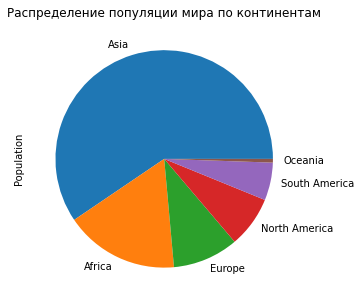

In [29]:
# Распределение популяции Земли, по континентам на 2019г.
pie_distribution_population_continents = pd.DataFrame(population.groupby('Continent').Population.sum())\
                                                                .sort_values('Population', ascending=False)
pie_distribution_population_continents.plot.pie(y='Population', figsize=(5, 5),\
                                                title='Распределение популяции мира по континентам', legend=False)

In [30]:
# Страны с максимальной популяцией по континентам в 2019г. (млн. человек)
countries_max_populations_continents = population[population.groupby('Continent').Population.transform(lambda x: x == x.max())]\
                                       .sort_values('Continent')
countries_max_populations_continents

,Country,NativeName,Code,Continent,Region,Population
180,Nigeria,Nijeriya,NGA,Africa,Sub-Saharan Africa,200.964
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,1397.715
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,144.406
6,United States of America,United States of America,USA,North America,Northern America,328.240
68,Australia,Australia,AUS,Oceania,Oceania,25.366
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,211.050


In [31]:
# Страны с минимальной популяцией по континентам в 2019г. (млн. человек)
countries_min_populations_continents = population[population.groupby('Continent').Population.transform(lambda x: x == x.min())]\
                                       .sort_values('Continent')
countries_min_populations_continents

,Country,NativeName,Code,Continent,Region,Population
185,Seychelles,Republique des Seychelles,SYC,Africa,Sub-Saharan Africa,0.098
144,Brunei,Brunei,BRN,Asia,Asia,0.433
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,Western Europe,0.034
105,Antigua and Barbuda,Antigua and Barbuda,ATG,North America,Latin Amer. & Carib,0.097
77,Tuvalu,Tuvalu,TUV,Oceania,Oceania,0.012
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,Latin Amer. & Carib,0.053


## 3. Плотность населения мира

In [32]:
population_density = full_df[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area', 'Population', 'Pop_Density']]
population_density.head()

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density
0,Canada,Canada,CAN,North America,Northern America,25860195.0,37.593,1.0
1,Japan,日本,JPN,Asia,Asia,978589.0,126.265,129.0
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,838644.0,5.348,6.0
3,Ireland,Eire,IRL,Europe,Western Europe,182024.0,4.934,27.0
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,240947.0,9.771,41.0


In [33]:
# Страна с максимальной плотностью населения (человек на км. кв.)
population_density_max = population_density.query('Pop_Density == {}'.format(population_density['Pop_Density'].max()))\
                         [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area', 'Population', 'Pop_Density']]
population_density_max

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,5.0,0.039,7800.0


In [34]:
population_density_min = population_density[population_density.Pop_Density.transform(lambda x: x == x.min())].copy()
population_density_min

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density
0,Canada,Canada,CAN,North America,Northern America,25860195.0,37.593,1.0
32,Iceland,Island,ISL,Europe,Western Europe,266769.0,0.361,1.0
68,Australia,Australia,AUS,Oceania,Oceania,19908865.0,25.366,1.0
88,Mongolia,Монгол Улс,MNG,Asia,Asia,4051045.0,3.225,1.0
91,Suriname,Republiek Suriname,SUR,South America,Latin Amer. & Carib,422868.0,0.581,1.0
93,Guyana,Co-operative Republic of Guyana,GUY,South America,Latin Amer. & Carib,556770.0,0.783,1.0
153,Botswana,Botswana,BWA,Africa,Sub-Saharan Africa,1554952.0,2.304,1.0
171,Libya,دولة ليبيا,LBY,Africa,Northern Africa,4557191.0,6.777,1.0
178,Namibia,Republic of Namibia,NAM,Africa,Sub-Saharan Africa,2137824.0,2.495,1.0


In [35]:
# Страны с минимальной плотностью населения (человек на км. кв.)
population_density_min = population_density.query('Pop_Density == {}'.format(population_density['Pop_Density'].min()))\
                         [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area', 'Population', 'Pop_Density']]
population_density_min

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density
0,Canada,Canada,CAN,North America,Northern America,25860195.0,37.593,1.0
32,Iceland,Island,ISL,Europe,Western Europe,266769.0,0.361,1.0
68,Australia,Australia,AUS,Oceania,Oceania,19908865.0,25.366,1.0
88,Mongolia,Монгол Улс,MNG,Asia,Asia,4051045.0,3.225,1.0
91,Suriname,Republiek Suriname,SUR,South America,Latin Amer. & Carib,422868.0,0.581,1.0
93,Guyana,Co-operative Republic of Guyana,GUY,South America,Latin Amer. & Carib,556770.0,0.783,1.0
153,Botswana,Botswana,BWA,Africa,Sub-Saharan Africa,1554952.0,2.304,1.0
171,Libya,دولة ليبيا,LBY,Africa,Northern Africa,4557191.0,6.777,1.0
178,Namibia,Republic of Namibia,NAM,Africa,Sub-Saharan Africa,2137824.0,2.495,1.0


In [36]:
# Плотности населения континентов (чел. на кв. км.)
population_density_continents = population_density.groupby('Continent').agg({'Population': 'sum', 'Area': 'sum'}).reset_index()
population_density_continents.Area = population_density_continents.Area / 1000000
population_density_continents['Pop_Density'] = round(population_density_continents['Population'] / population_density_continents['Area'])
population_density_continents.index = population_density_continents.Continent
population_density_continents.drop(population_density_continents.columns[[0]], axis=1, inplace=True)
population_density_continents = population_density_continents.sort_values(by='Pop_Density', ascending=False)
population_density_continents

,Population,Area,Pop_Density
Continent,,,
Asia,4529.576,80.711840,56.0
Africa,1291.376,77.568100,17.0
Europe,744.367,59.469325,13.0
North America,580.911,57.803658,10.0
South America,427.578,45.921273,9.0
Oceania,41.616,22.001586,2.0


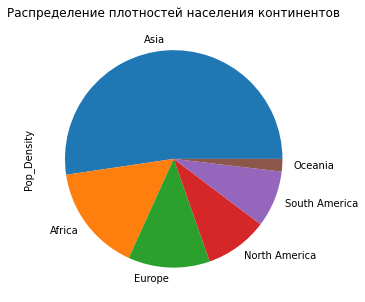

In [37]:
pie_population_density_continents = population_density_continents.plot.pie(y='Pop_Density', figsize=(5, 5),\
                                    title='Распределение плотностей населения континентов', legend=False)

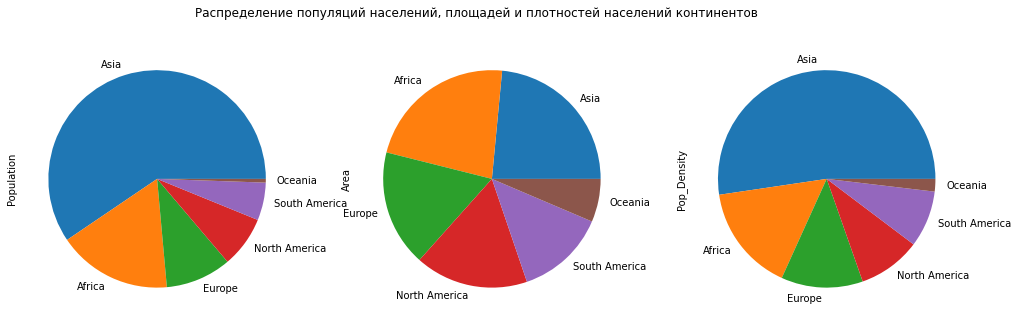

In [38]:
pies_population_area_population_density_continents = population_density_continents.plot.pie(subplots=True, figsize=(17, 5),\
                                    title='Распределение популяций населений, площадей и плотностей населений континентов',\
                                    legend=False)

Text(0.5, 1.0, 'Distribution of population density by continents (Распределение плотностей населения по континентам)')

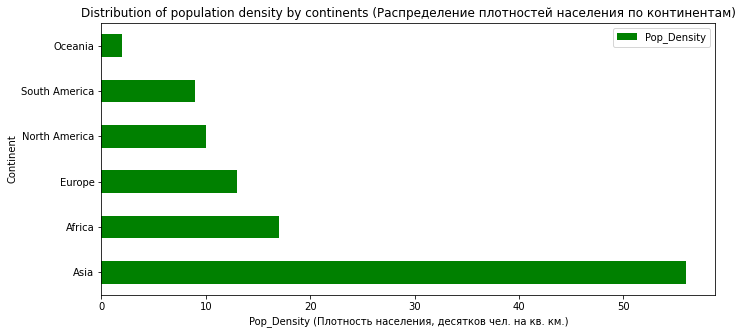

In [39]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
barh_population_density_continents = population_density_continents['Pop_Density'].plot(kind='barh', ax=ax, color='green', legend=True)
ax.set_xlabel('Pop_Density (Плотность населения, десятков чел. на кв. км.)')
ax.set_title('Distribution of population density by continents (Распределение плотностей населения по континентам)')

Text(0.5, 1.0, 'Распределение площадей территорий и плотностей населений континентов')

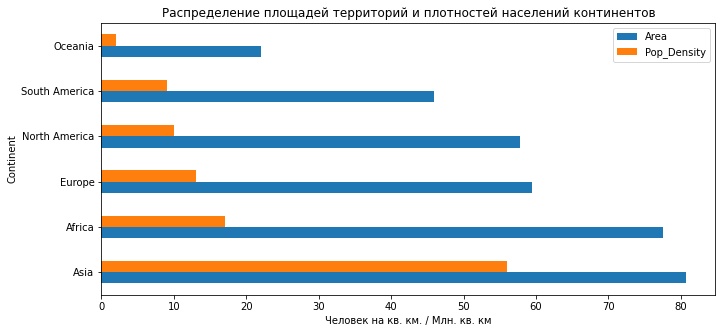

In [40]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
barh_population_density_continents = population_density_continents[['Area', 'Pop_Density']].plot(kind='barh', ax=ax, legend=True)
ax.set_xlabel('Человек на кв. км. / Млн. кв. км')
ax.set_title('Распределение площадей территорий и плотностей населений континентов')

In [41]:
# Страны с максимальной плотностью населения по континентам в 2019г. (млн. человек)
countries_max_populations_density_continents = population_density[population_density.groupby('Continent').Pop_Density\
                                                .transform(lambda x: x == x.max())].sort_values('Continent')
countries_max_populations_density_continents

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density
175,Mauritius,Republique de Maurice,MUS,Africa,Sub-Saharan Africa,5284.0,1.266,240.0
63,Singapore,Republic of Singapore,SGP,Asia,Asia,1795.0,5.704,3178.0
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,5.0,0.039,7800.0
57,Barbados,Barbados,BRB,North America,Latin Amer. & Carib,1116.0,0.287,257.0
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,54.0,0.013,241.0
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,Latin Amer. & Carib,676.0,0.053,78.0


In [42]:
# Страны с минимальной плотностью населения по континентам в 2019г. (млн. человек)
countries_min_populations_density_continents = population_density[population_density.groupby('Continent').Pop_Density\
                                                .transform(lambda x: x == x.min())].sort_values('Continent')
countries_min_populations_density_continents

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density
153,Botswana,Botswana,BWA,Africa,Sub-Saharan Africa,1554952.0,2.304,1.0
171,Libya,دولة ليبيا,LBY,Africa,Northern Africa,4557191.0,6.777,1.0
178,Namibia,Republic of Namibia,NAM,Africa,Sub-Saharan Africa,2137824.0,2.495,1.0
88,Mongolia,Монгол Улс,MNG,Asia,Asia,4051045.0,3.225,1.0
32,Iceland,Island,ISL,Europe,Western Europe,266769.0,0.361,1.0
0,Canada,Canada,CAN,North America,Northern America,25860195.0,37.593,1.0
68,Australia,Australia,AUS,Oceania,Oceania,19908865.0,25.366,1.0
91,Suriname,Republiek Suriname,SUR,South America,Latin Amer. & Carib,422868.0,0.581,1.0
93,Guyana,Co-operative Republic of Guyana,GUY,South America,Latin Amer. & Carib,556770.0,0.783,1.0


In [43]:
#population_density['Area'] = round(population_density['Area'] / 1000000, 1)
#population_density.loc[:, 5] = round(population_density['Area'] / 1000000, 1)

<AxesSubplot:title={'center':'Correlation between Population, Area and Pop_Density'}, xlabel='Area', ylabel='Pop_Density'>

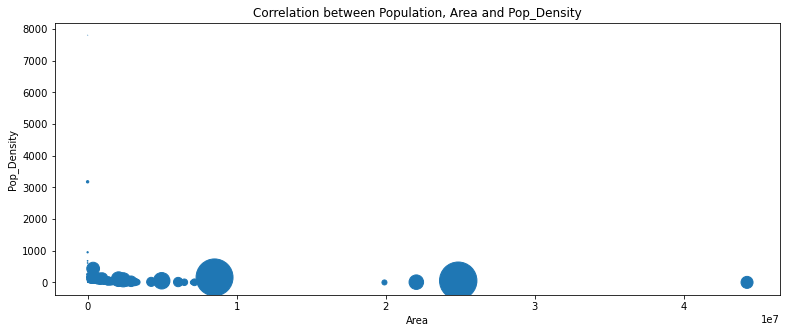

In [44]:
# Взаимосвязь популяций, площадей территорий и плотностей населений стран в млн. чел. 
population_density.plot(kind='scatter', 
                           x='Area', 
                           y='Pop_Density',
                           s='Population',
                       title='Correlation between Population, Area and Pop_Density')

## 4. Динамика популяции мира c 2010 по 2019 г.г

In [45]:
population = full_df[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Pop2010', 'Pop2011', 'Pop2012', 'Pop2013',\
                      'Pop2014', 'Pop2015', 'Pop2016', 'Pop2017', 'Pop2018', 'Population']]
population.head()

,Country,NativeName,Code,Continent,Region,Pop2010,Pop2011,Pop2012,Pop2013,Pop2014,Pop2015,Pop2016,Pop2017,Pop2018,Population
0,Canada,Canada,CAN,North America,Northern America,34.005,34.339,34.714,35.083,35.437,35.703,36.109,36.545,37.065,37.593
1,Japan,日本,JPN,Asia,Asia,128.070,127.833,127.629,127.445,127.276,127.141,126.995,126.786,126.529,126.265
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,4.889,4.953,5.019,5.080,5.137,5.189,5.235,5.277,5.312,5.348
3,Ireland,Eire,IRL,Europe,Western Europe,4.560,4.580,4.600,4.624,4.658,4.702,4.755,4.807,4.867,4.934
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,10.000,9.972,9.920,9.893,9.866,9.843,9.814,9.788,9.776,9.771


Text(0, 0.5, 'Популяция, млн. человек')

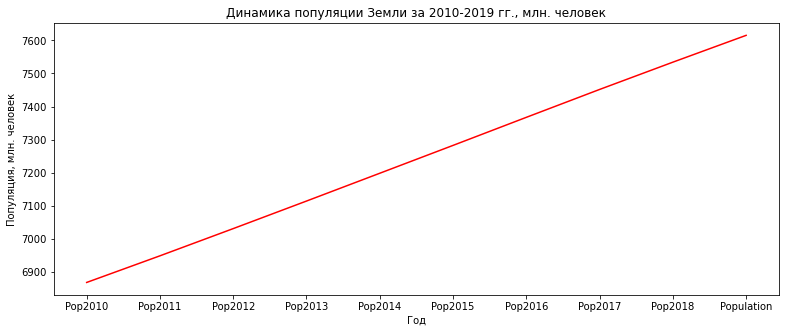

In [46]:
dynamics_population = population.iloc[:, 5:]
dynamics_population = dynamics_population.T
dynamics_population['Total'] = dynamics_population.iloc[:, 0:].sum(axis=1)
dynamics_population
#fig = plt.figure(figsize=(15, 5))
#rcParams['figure.figsize'] = 18,5
plt.plot(dynamics_population.index, dynamics_population['Total'], c='r')
plt.title('Динамика популяции Земли за 2010-2019 гг., млн. человек')
plt.xlabel('Год')
plt.ylabel('Популяция, млн. человек')

In [47]:
# TOP-10 стран с наибольшей популяцией на 2010г.
top10_max_population_2010 = population.sort_values(by='Pop2010', ascending=False).head(105)\
                            [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Pop2010']]
top10_max_population_2010

,Country,NativeName,Code,Continent,Region,Pop2010
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,1337.705
76,India,Republic of India,IND,Asia,Asia,1234.281
6,United States of America,United States of America,USA,North America,Northern America,309.322
58,Indonesia,Republik Indonesia,IDN,Asia,Asia,241.834
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,195.714
...,...,...,...,...,...,...
148,Togo,Togo,TGO,Africa,Sub-Saharan Africa,6.422
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,6.416
121,Laos,ສາທາລະນະລັດ ປະຊາທິປະໄຕ ປະຊາຊົນລາວ,LAO,Asia,Asia,6.249
92,Paraguay,Republica del Paraguay,PRY,South America,Latin Amer. & Carib,6.248


In [48]:
# TOP-10 стран с наибольшей популяцией на 2019г.
top10_max_population_2019 = population.sort_values(by='Population', ascending=False).head(10)\
                            [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Population']]
top10_max_population_2019

,Country,NativeName,Code,Continent,Region,Population
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,1397.715
76,India,Republic of India,IND,Asia,Asia,1366.418
6,United States of America,United States of America,USA,North America,Northern America,328.240
58,Indonesia,Republik Indonesia,IDN,Asia,Asia,270.626
128,Pakistan,پاکستان,PAK,Asia,Asia,216.565
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,211.050
180,Nigeria,Nijeriya,NGA,Africa,Sub-Saharan Africa,200.964
140,Bangladesh,গণপ্রজাতন্ত্রী বাংলাদেশ,BGD,Asia,Asia,163.046
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,144.406
21,Mexico,México,MEX,North America,Latin Amer. & Carib,127.576


In [49]:
# TOP-10 стран с наименьшей популяцией на 2010г.
top10_min_population_2010 = population.sort_values(by='Pop2010', ascending=True).head(10)\
                            [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Pop2010']]
top10_min_population_2010

,Country,NativeName,Code,Continent,Region,Pop2010
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.010
77,Tuvalu,Tuvalu,TUV,Oceania,Oceania,0.011
83,Palau,Republic of Palau,PLW,Oceania,Oceania,0.018
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,Western Europe,0.031
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.036
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,0.036
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,Latin Amer. & Carib,0.049
86,Marshall Islands,Aolepān Aorōkin M̧ajeļ,MHL,Oceania,Oceania,0.056
107,Dominica,Commonwealth of Dominica,DMA,South America,Latin Amer. & Carib,0.071
47,Andorra,Andorra,AND,Europe,Western Europe,0.084


In [50]:
# TOP-10 стран с наименьшей популяцией на 2019г.
top10_min_population_2019 = population.sort_values(by='Population', ascending=True).head(10)\
                            [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Population']]
top10_min_population_2019

,Country,NativeName,Code,Continent,Region,Population
77,Tuvalu,Tuvalu,TUV,Oceania,Oceania,0.012
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.013
83,Palau,Republic of Palau,PLW,Oceania,Oceania,0.018
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,Western Europe,0.034
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,0.038
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.039
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,Latin Amer. & Carib,0.053
86,Marshall Islands,Aolepān Aorōkin M̧ajeļ,MHL,Oceania,Oceania,0.059
107,Dominica,Commonwealth of Dominica,DMA,South America,Latin Amer. & Carib,0.072
47,Andorra,Andorra,AND,Europe,Western Europe,0.077


### Динамика популяции континентов с 2010 по 2019 г.г

In [51]:
dynamic_population_continents = population.groupby('Continent').sum().reset_index().T
dynamic_population_continents.rename(columns = { 
    dynamic_population_continents.columns[0]: 'Africa',
    dynamic_population_continents.columns[1]: 'Asia',
    dynamic_population_continents.columns[2]: 'Europe',
    dynamic_population_continents.columns[3]: 'Northern America',
    dynamic_population_continents.columns[4]: 'Oceania',
    dynamic_population_continents.columns[5]: 'South America'
}, inplace = True)
dynamic_population_continents = dynamic_population_continents.iloc[1:, 0:]
dynamic_population_continents

,Africa,Asia,Europe,Northern America,Oceania,South America
Pop2010,1025.08,4143.35,734.075,536.313,35.909,392.676
Pop2011,1051.97,4187.66,733.745,541.452,36.439,396.752
Pop2012,1079.61,4231.29,735.004,546.652,37.041,400.799
Pop2013,1108.03,4274.85,736.755,551.714,37.656,404.806
Pop2014,1137.12,4318.45,738.49,556.874,38.263,408.764
Pop2015,1166.85,4361.79,740.171,561.942,38.889,412.652
Pop2016,1197.17,4405.21,741.731,567.083,39.565,416.471
Pop2017,1228.08,4448.31,742.798,571.952,40.275,420.226
Pop2018,1259.51,4489.75,743.59,576.524,40.948,423.92
Population,1291.38,4529.58,744.367,580.911,41.616,427.578


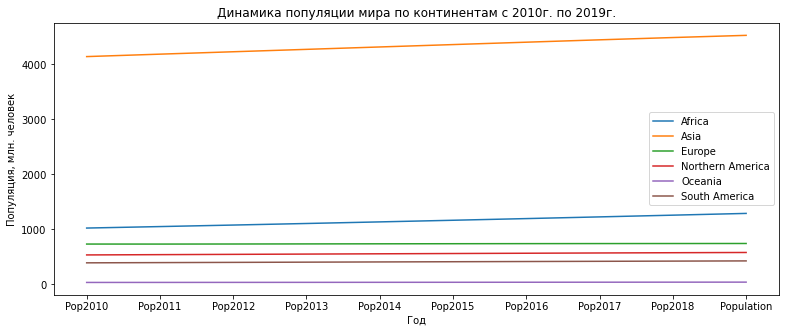

In [52]:
#fig = plt.figure(figsize=(15, 6))
for continent in dynamic_population_continents.columns:
    plt.plot(dynamic_population_continents.index, dynamic_population_continents[continent])

plt.title('Динамика популяции мира по континентам с 2010г. по 2019г.')
plt.xlabel('Год')
plt.ylabel('Популяция, млн. человек') 
plt.legend(dynamic_population_continents)

<AxesSubplot:title={'center':'Динамика популяции мира по континентам с 2010г. по 2019г.'}, xlabel='Год', ylabel='Популяция, млн. человек'>

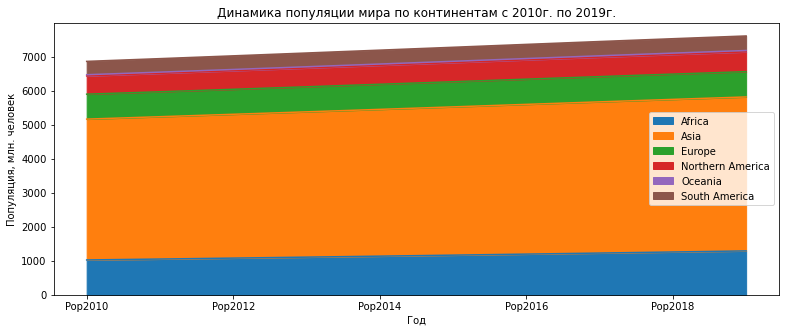

In [53]:
#fig = plt.figure(figsize=(15, 7))
dynamic_population_continents.plot(kind='area',
                             title='Динамика популяции мира по континентам с 2010г. по 2019г.', 
                             xlabel='Год', 
                             #stacked=False,
                             ylabel='Популяция, млн. человек')

<AxesSubplot:title={'center':'Динамика популяции мира по континентам с 2010 по 2019 г.г.'}>

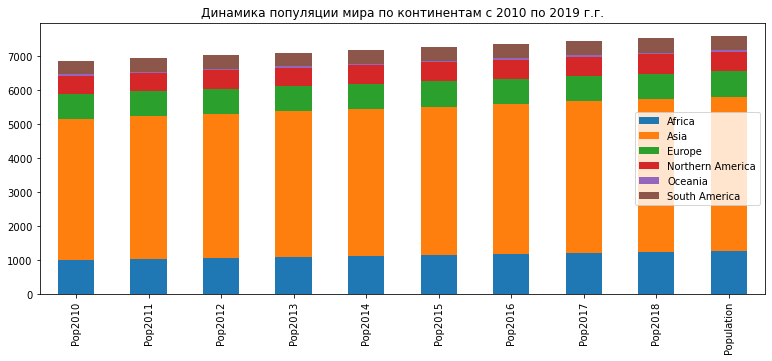

In [54]:
#fig = plt.figure(figsize=(15, 7))
dynamic_population_continents.plot(kind='bar', 
                                   title='Динамика популяции мира по континентам с 2010 по 2019 г.г.',
                                   stacked=True)

In [55]:
#options.mode.chained_assignment = None
full_df.is_copy = False

## 5. Прирост населения мира с 2010 по 2019 г.г

In [56]:
growth = full_df[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Pop2010', 'Pop2011', 'Pop2012', 'Pop2013',\
                      'Pop2014', 'Pop2015', 'Pop2016', 'Pop2017', 'Pop2018', 'Population']]
growth.loc[0:, 'Gr2011'] = growth['Pop2011'] - growth['Pop2010']
growth.loc[0:, 'Gr2012'] = growth['Pop2012'] - growth['Pop2011']
growth.loc[0:, 'Gr2013'] = growth['Pop2013'] - growth['Pop2012']
growth.loc[0:, 'Gr2014'] = growth['Pop2014'] - growth['Pop2013']
growth.loc[0:, 'Gr2015'] = growth['Pop2015'] - growth['Pop2014']
growth.loc[0:, 'Gr2016'] = growth['Pop2016'] - growth['Pop2015']
growth.loc[0:, 'Gr2017'] = growth['Pop2017'] - growth['Pop2016']
growth.loc[0:, 'Gr2018'] = growth['Pop2018'] - growth['Pop2017']
growth.loc[0:, 'Gr2019'] = growth['Population'] - growth['Pop2018']
growth.loc[0:, 'Growth'] = growth.iloc[0:, 15:].sum(axis=1)
growth.loc[0:, 'Growth_Parts_Pct'] = round(growth['Growth'] / growth['Growth'].sum() * 100, 3) # Доля от общего прироста населения мира
growth.loc[0:, 'Growth_Pct'] = round(growth['Growth'] / growth['Pop2010'] * 100, 1) # Прирост населения страны c 2010 по 2019 г.г


growth.head()

C:\Users\GRALEX\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\GRALEX\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Country,NativeName,Code,Continent,Region,Pop2010,Pop2011,Pop2012,Pop2013,Pop2014,...,Gr2013,Gr2014,Gr2015,Gr2016,Gr2017,Gr2018,Gr2019,Growth,Growth_Parts_Pct,Growth_Pct
0,Canada,Canada,CAN,North America,Northern America,34.005,34.339,34.714,35.083,35.437,...,0.369,0.354,0.266,0.406,0.436,0.520,0.528,3.588,0.480,10.6
1,Japan,日本,JPN,Asia,Asia,128.070,127.833,127.629,127.445,127.276,...,-0.184,-0.169,-0.135,-0.146,-0.209,-0.257,-0.264,-1.805,-0.241,-1.4
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,4.889,4.953,5.019,5.080,5.137,...,0.061,0.057,0.052,0.046,0.042,0.035,0.036,0.459,0.061,9.4
3,Ireland,Eire,IRL,Europe,Western Europe,4.560,4.580,4.600,4.624,4.658,...,0.024,0.034,0.044,0.053,0.052,0.060,0.067,0.374,0.050,8.2
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,10.000,9.972,9.920,9.893,9.866,...,-0.027,-0.027,-0.023,-0.029,-0.026,-0.012,-0.005,-0.229,-0.031,-2.3


In [50]:
# Страна с максимальным приростом популяции (в рамках общей популяции) за период 2010-2019 г.г.
max_growth = growth.query('Growth == {}'.format(growth['Growth'].max()))\
             [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct']]
max_growth

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct
76,India,Republic of India,IND,Asia,Asia,132.137,17.665


In [51]:
# Страна с минимальным приростом популяции (с максимальной убылью населения, в рамках общей популяции) за период 2010-2019 г.г.
max_growth = growth.query('Growth == {}'.format(growth['Growth'].min()))\
             [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct']]
max_growth

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574


In [52]:
# Страны с максимальным приростом населения по континентам в 2019г. (млн. человек)
countries_max_growths_continents = growth[growth.groupby('Continent').Growth\
                                                .transform(lambda x: x == x.max())].sort_values('Continent')
countries_max_growths_continents = countries_max_growths_continents\
                                   [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct']]
countries_max_growths_continents

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct
180,Nigeria,Nijeriya,NGA,Africa,Sub-Saharan Africa,42.461,5.676
76,India,Republic of India,IND,Asia,Asia,132.137,17.665
26,United Kingdom,United Kingdom of Great Britain and Northern I...,GBR,Europe,Western Europe,4.070,0.544
6,United States of America,United States of America,USA,North America,Northern America,18.918,2.529
68,Australia,Australia,AUS,Oceania,Oceania,3.334,0.446
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,15.336,2.050


In [53]:
# Страны с минимальным приростом населения по континентам в 2019г. (млн. человек)
countries_min_growths_continents = growth[growth.groupby('Continent').Growth\
                                                .transform(lambda x: x == x.min())].sort_values('Continent')
countries_min_growths_continents = countries_min_growths_continents\
                                   [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct']]
countries_min_growths_continents

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct
185,Seychelles,Republique des Seychelles,SYC,Africa,Sub-Saharan Africa,0.008,0.001
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574
35,Ukraine,Україна,UKR,Europe,C.W. Of Ind. States,-1.485,-0.199
98,Saint Vincent and the Grenadines,Saint Vincent and the Grenadines,VCT,North America,Latin Amer. & Carib,0.003,0.000
78,Tonga,Tonga,TON,Oceania,Oceania,0.000,0.000
83,Palau,Republic of Palau,PLW,Oceania,Oceania,0.000,0.000
107,Dominica,Commonwealth of Dominica,DMA,South America,Latin Amer. & Carib,0.001,0.000


In [54]:
growth_europe = growth.loc[growth.Continent.str.contains('Europe')]
growth_africa = growth.loc[growth.Continent.str.contains('Africa')]
growth_asia = growth.loc[growth.Continent.str.contains('Asia')]
growth_north_america = growth.loc[growth.Continent.str.contains('North America')]
growth_south_america = growth.loc[growth.Continent.str.contains('South America')]
growth_oceania = growth.loc[growth.Continent.str.contains('Oceania')]

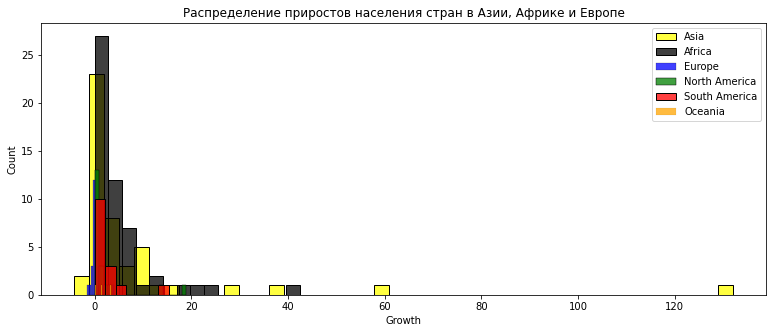

In [55]:
sns.histplot(growth_asia, x='Growth', color='yellow')
sns.histplot(growth_africa, x='Growth', color='black')
sns.histplot(growth_europe, x='Growth', color='blue')
sns.histplot(growth_north_america, x='Growth', color='green')
sns.histplot(growth_south_america, x='Growth', color='red')
sns.histplot(growth_oceania, x='Growth', color='orange')
plt.title('Распределение приростов населения стран в Азии, Африке и Европе')
plt.legend(population_density_continents.index.unique())
#plt.legend(countries_world.Continent.unique())

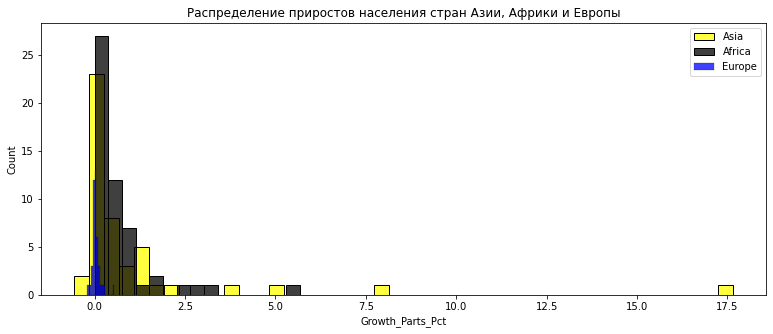

In [56]:
sns.histplot(growth_asia, x='Growth_Parts_Pct', color='yellow')
sns.histplot(growth_africa, x='Growth_Parts_Pct', color='black')
sns.histplot(growth_europe, x='Growth_Parts_Pct', color='blue')
#sns.histplot(north_america, x='GrPerc', color='green')
#sns.histplot(south_america, x='GrPerc', color='orange')
#sns.histplot(oceania, x='GrPerc', color='brown')
plt.title('Распределение приростов населения стран Азии, Африки и Европы')
plt.legend(population_density_continents.index.unique())

### Динамика прироста населения мира c 2010 по 2019 г.г

In [57]:
dynamic_growth_population = growth.iloc[:, 15:24]
dynamic_growth_population = dynamic_growth_population.T
dynamic_growth_population['Total'] = dynamic_growth_population.iloc[:, 0:].sum(axis=1)
dynamic_growth_population

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,Total
Gr2011,0.334,-0.237,0.064,0.020,-0.028,0.166,2.235,0.142,0.011,0.025,...,0.005,0.356,-0.003,0.147,0.332,0.805,0.007,0.078,0.023,80.609
Gr2012,0.375,-0.204,0.066,0.020,-0.052,0.030,2.274,0.069,0.013,0.026,...,0.003,0.368,0.001,0.150,0.340,0.844,0.007,0.062,0.021,82.378
Gr2013,0.369,-0.184,0.061,0.024,-0.027,-0.153,2.163,0.052,0.012,0.025,...,0.004,0.380,0.002,0.151,0.348,0.879,0.008,0.049,0.023,83.411
Gr2014,0.354,-0.169,0.057,0.034,-0.027,-0.139,2.307,0.050,0.013,0.023,...,0.004,0.393,0.001,0.153,0.360,0.905,0.008,0.061,0.028,84.164
Gr2015,0.266,-0.135,0.052,0.044,-0.023,-0.036,2.334,0.065,0.014,0.018,...,0.003,0.403,0.002,0.155,0.373,0.925,0.009,0.075,0.040,84.320
Gr2016,0.406,-0.146,0.046,0.053,-0.029,0.039,2.306,0.057,0.012,0.015,...,0.004,0.416,0.002,0.157,0.389,0.944,0.010,0.090,0.045,84.947
Gr2017,0.436,-0.209,0.042,0.052,-0.026,0.109,2.045,0.044,0.014,0.013,...,0.004,0.425,0.001,0.159,0.403,0.966,0.011,0.101,0.037,84.406
Gr2018,0.520,-0.257,0.035,0.060,-0.012,0.205,1.702,0.052,0.012,0.008,...,0.004,0.435,0.001,0.162,0.419,0.989,0.011,0.101,0.029,82.600
Gr2019,0.528,-0.264,0.036,0.067,-0.005,0.336,1.552,0.076,0.012,0.006,...,0.004,0.442,0.001,0.163,0.435,1.011,0.012,0.113,0.020,81.180


Text(0, 0.5, 'Прирост, млн. человек')

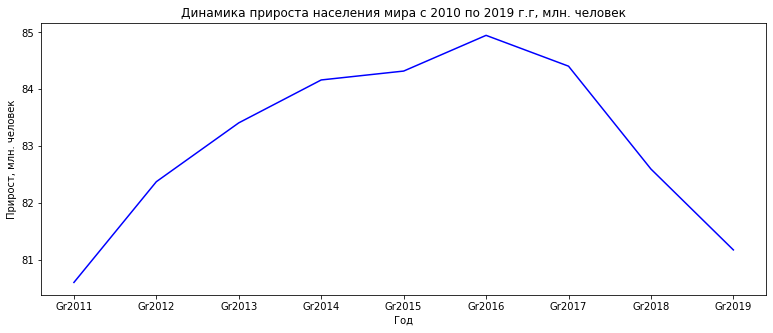

In [58]:
plt.plot(dynamic_growth_population.index, dynamic_growth_population['Total'], c='b')
plt.title('Динамика прироста населения мира c 2010 по 2019 г.г, млн. человек')
plt.xlabel('Год')
plt.ylabel('Прирост, млн. человек')

In [59]:
# TOP-10 стран с наибольшим приростом населения (в рамках общей популяции) за период 2010-2019 г.г.
top10_max_growth = growth.sort_values(by='Growth', ascending=False).head(10)\
                   [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct']]
top10_max_growth

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct
76,India,Republic of India,IND,Asia,Asia,132.137,17.665
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,60.010,8.023
180,Nigeria,Nijeriya,NGA,Africa,Sub-Saharan Africa,42.461,5.676
128,Pakistan,پاکستان,PAK,Asia,Asia,37.140,4.965
58,Indonesia,Republik Indonesia,IDN,Asia,Asia,28.792,3.849
23,Ethiopia,ኢትዮጵያ,ETH,Africa,Sub-Saharan Africa,24.439,3.267
158,Democratic Republic of the Congo,Republique Democratique du Congo,COD,Africa,Sub-Saharan Africa,22.227,2.971
6,United States of America,United States of America,USA,North America,Northern America,18.918,2.529
20,Egypt,جُمهورِيّةُ مِصرَ العَرَبيّةِ,EGY,Africa,Northern Africa,17.627,2.357
140,Bangladesh,গণপ্রজাতন্ত্রী বাংলাদেশ,BGD,Asia,Asia,15.471,2.068


In [60]:
# Страны с убылью населения (в абсолютном значении, доля от общего прироста в %) за период 2010-2019 г.г. (млн. чел.)
countries_less_growth = growth[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct']]\
                        .loc[growth.Growth <= 0].sort_values(by='Growth')
countries_less_growth

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574
1,Japan,日本,JPN,Asia,Asia,-1.805,-0.241
35,Ukraine,Україна,UKR,Europe,C.W. Of Ind. States,-1.485,-0.199
40,Romania,Romania,ROU,Europe,Eastern Europe,-0.881,-0.118
41,Bulgaria,България,BGR,Europe,Eastern Europe,-0.420,-0.056
16,Greece,Ελλάδα,GRC,Europe,Western Europe,-0.404,-0.054
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,Eastern Europe,-0.404,-0.054
67,Serbia,Србија,SRB,Europe,Eastern Europe,-0.346,-0.046
12,Lithuania,Lietuva,LTU,Europe,Baltics,-0.303,-0.041
18,Portugal,Republica Portuguesa,PRT,Europe,Western Europe,-0.287,-0.038


### Динамика прироста популяций континентов с 2010 по 2019 г.г

In [61]:
dynamic_growth_population_continents = growth.drop(growth.columns[[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 24, 25, 26]], axis=1)
dynamic_growth_population_continents = dynamic_growth_population_continents.groupby('Continent').sum().reset_index().T
dynamic_growth_population_continents.rename(columns = { 
    dynamic_growth_population_continents.columns[0]: 'Africa',
    dynamic_growth_population_continents.columns[1]: 'Asia',
    dynamic_growth_population_continents.columns[2]: 'Europe',
    dynamic_growth_population_continents.columns[3]: 'Northern America',
    dynamic_growth_population_continents.columns[4]: 'Oceania',
    dynamic_growth_population_continents.columns[5]: 'South America'
}, inplace = True)
dynamic_growth_population_continents = dynamic_growth_population_continents.iloc[1:, 0:]
dynamic_growth_population_continents['Total'] = dynamic_growth_population_continents.iloc[0:, 0:].sum(axis=1)
dynamic_growth_population_continents

,Africa,Asia,Europe,Northern America,Oceania,South America,Total
Gr2011,26.884,44.31,-0.33,5.139,0.53,4.076,80.609
Gr2012,27.643,43.627,1.259,5.2,0.602,4.047,82.378
Gr2013,28.418,43.558,1.751,5.062,0.615,4.007,83.411
Gr2014,29.097,43.607,1.735,5.16,0.607,3.958,84.164
Gr2015,29.72,43.337,1.681,5.068,0.626,3.888,84.320
Gr2016,30.33,43.421,1.56,5.141,0.676,3.819,84.947
Gr2017,30.907,43.098,1.067,4.869,0.71,3.755,84.406
Gr2018,31.427,41.442,0.792,4.572,0.673,3.694,82.600
Gr2019,31.867,39.823,0.777,4.387,0.668,3.658,81.180


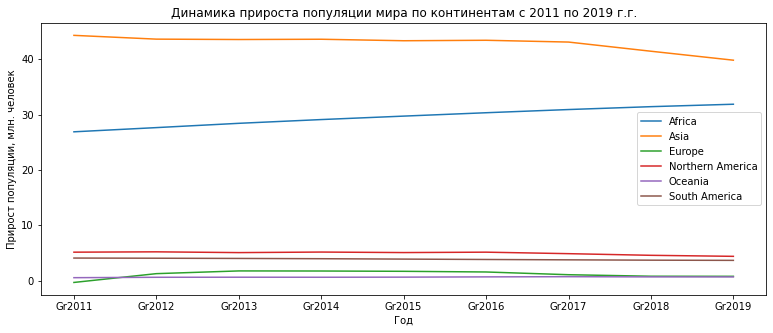

In [62]:
plot_dynamic_growth_population_continents = dynamic_growth_population_continents.iloc[0:, 0:-1]
for continent in plot_dynamic_growth_population_continents.columns:
    plt.plot(plot_dynamic_growth_population_continents.index, plot_dynamic_growth_population_continents[continent])
plt.title('Динамика прироста популяции мира по континентам с 2011 по 2019 г.г.')
plt.xlabel('Год')
plt.ylabel('Прирост популяции, млн. человек') 
plt.legend(plot_dynamic_growth_population_continents)

<AxesSubplot:title={'center':'Динамика прироста популяции мира по континентам с 2011 по 2019 г.г.'}, xlabel='Год', ylabel='Прирост популяции, млн. человек'>

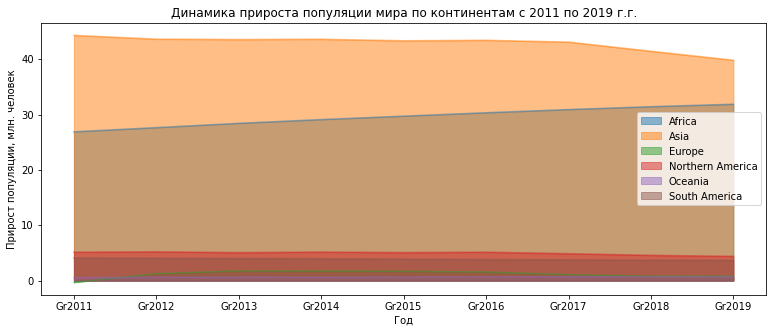

In [63]:
dynamic_growth_population_continents.iloc[0:, 0:-1].plot(kind='area',
                             title='Динамика прироста популяции мира по континентам с 2011 по 2019 г.г.', 
                             xlabel='Год', 
                             stacked=False,
                             ylabel='Прирост популяции, млн. человек')

<AxesSubplot:title={'center':'Динамика прироста популяции мира по континентам с 2011 по 2019 г.г.'}, xlabel='Год', ylabel='Общий прирост популяции, млн. человек'>

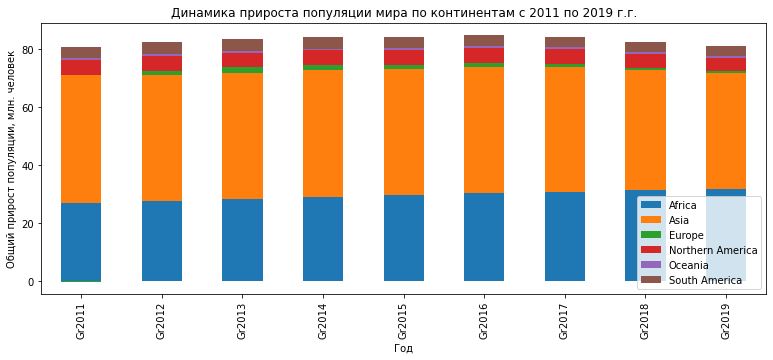

In [64]:
dynamic_growth_population_continents.iloc[0:, 0:-1].plot(kind='bar', 
                                              title='Динамика прироста популяции мира по континентам с 2011 по 2019 г.г.', 
                                              xlabel='Год',
                                              ylabel='Общий прирост популяции, млн. человек',
                                              stacked=True)

In [65]:
# Cтраны с естественной приростом населения выше среднеого значения (в рамках общей популяции, в абсолютном значении),
# за период 2010-2019 г.г.
growth.query('Growth > {}'.format(growth['Growth'].mean()))\
       [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct']]\
      .sort_values('Growth', ascending=False)

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct
76,India,Republic of India,IND,Asia,Asia,132.137,17.665
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,60.010,8.023
180,Nigeria,Nijeriya,NGA,Africa,Sub-Saharan Africa,42.461,5.676
128,Pakistan,پاکستان,PAK,Asia,Asia,37.140,4.965
58,Indonesia,Republik Indonesia,IDN,Asia,Asia,28.792,3.849
23,Ethiopia,ኢትዮጵያ,ETH,Africa,Sub-Saharan Africa,24.439,3.267
158,Democratic Republic of the Congo,Republique Democratique du Congo,COD,Africa,Sub-Saharan Africa,22.227,2.971
6,United States of America,United States of America,USA,North America,Northern America,18.918,2.529
20,Egypt,جُمهورِيّةُ مِصرَ العَرَبيّةِ,EGY,Africa,Northern Africa,17.627,2.357
140,Bangladesh,গণপ্রজাতন্ত্রী বাংলাদেশ,BGD,Asia,Asia,15.471,2.068


## 6. Прирост популяций стран с 2010 по 2019 г.г

In [66]:
growth_countries = growth.iloc[:, :]
growth_countries.loc[0:, 'GrPct2011'] = round(growth_countries['Gr2011'] / growth_countries['Pop2010'] * 100, 1)
growth_countries.loc[0:, 'GrPct2012'] = round(growth_countries['Gr2012'] / growth_countries['Pop2011'] * 100, 1)
growth_countries.loc[0:, 'GrPct2013'] = round(growth_countries['Gr2013'] / growth_countries['Pop2012'] * 100, 1)
growth_countries.loc[0:, 'GrPct2014'] = round(growth_countries['Gr2014'] / growth_countries['Pop2013'] * 100, 1)
growth_countries.loc[0:, 'GrPct2015'] = round(growth_countries['Gr2015'] / growth_countries['Pop2014'] * 100, 1)
growth_countries.loc[0:, 'GrPct2016'] = round(growth_countries['Gr2016'] / growth_countries['Pop2015'] * 100, 1)
growth_countries.loc[0:, 'GrPct2017'] = round(growth_countries['Gr2017'] / growth_countries['Pop2016'] * 100, 1)
growth_countries.loc[0:, 'GrPct2018'] = round(growth_countries['Gr2018'] / growth_countries['Pop2017'] * 100, 1)
growth_countries.loc[0:, 'GrPct2019'] = round(growth_countries['Gr2019'] / growth_countries['Pop2018'] * 100, 1)
growth_countries.loc[0:, 'GrPctTotal'] = growth_countries.iloc[:, -9:].sum(axis=1)
growth_countries = growth_countries.drop(growth_countries.iloc[:, 5:14], axis=1)
growth_countries = growth_countries.drop(growth_countries.iloc[:, 6:15], axis=1)
growth_countries.head()

C:\Users\GRALEX\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\GRALEX\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Country,NativeName,Code,Continent,Region,Population,Growth,Growth_Parts_Pct,Growth_Pct,GrPct2011,GrPct2012,GrPct2013,GrPct2014,GrPct2015,GrPct2016,GrPct2017,GrPct2018,GrPct2019,GrPctTotal
0,Canada,Canada,CAN,North America,Northern America,37.593,3.588,0.480,10.6,1.0,1.1,1.1,1.0,0.8,1.1,1.2,1.4,1.4,10.1
1,Japan,日本,JPN,Asia,Asia,126.265,-1.805,-0.241,-1.4,-0.2,-0.2,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-1.4
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,5.348,0.459,0.061,9.4,1.3,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.7,9.0
3,Ireland,Eire,IRL,Europe,Western Europe,4.934,0.374,0.050,8.2,0.4,0.4,0.5,0.7,0.9,1.1,1.1,1.2,1.4,7.7
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,9.771,-0.229,-0.031,-2.3,-0.3,-0.5,-0.3,-0.3,-0.2,-0.3,-0.3,-0.1,-0.1,-2.4


In [67]:
# Страна с максимальным результатом прироста популяции (в рамках страны) за период 2010-2019 г.г.
max_growth_countries = growth_countries.query('Growth_Pct == {}'.format(growth['Growth_Pct'].max()))\
                       [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
max_growth_countries

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
127,Oman,سلطنة عُمان,OMN,Asia,Near East,1.934,0.259,63.6


In [68]:
# Страна с минимальным (отрицательным) результатом прироста популяции (с максимальнай убылью населения, в рамках страны) за период 2010-2019 г.г.
min_growth_countries = growth_countries.query('Growth_Pct == {}'.format(growth['Growth_Pct'].min()))\
                       [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
min_growth_countries

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574,-20.1


### Динамика прироста популяций стран по континентам с 2010 по 2019 г.г

In [69]:
dynamics_growth_countries_continents = growth_countries.groupby('Continent').sum().reset_index().T
dynamics_growth_countries_continents.rename(columns = { 
    dynamics_growth_countries_continents.columns[0]: 'Africa',
    dynamics_growth_countries_continents.columns[1]: 'Asia',
    dynamics_growth_countries_continents.columns[2]: 'Europe',
    dynamics_growth_countries_continents.columns[3]: 'Northern America',
    dynamics_growth_countries_continents.columns[4]: 'Oceania',
    dynamics_growth_countries_continents.columns[5]: 'South America'
}, inplace = True)
dynamics_growth_countries_continents = dynamics_growth_countries_continents.iloc[5:, 0:]
dynamics_growth_countries_continents['Total'] = dynamics_growth_countries_continents.iloc[0:, 0:].sum(axis=1)
dynamics_growth_countries_continents

,Africa,Asia,Europe,Northern America,Oceania,South America,Total
GrPct2011,124.9,96.2,4.4,21.6,14.6,14.3,276.0
GrPct2012,124.9,91.6,5.1,20.4,12.7,15.7,270.4
GrPct2013,126,88,10.3,22.5,23.6,13.4,283.8
GrPct2014,124,83.8,4.5,19.5,21.1,15.7,268.6
GrPct2015,124.8,79.7,8.9,19.7,15.9,12.9,261.9
GrPct2016,124.5,75.8,11.4,18.6,24.8,14.9,270.0
GrPct2017,122.9,70.7,7.2,18.7,14.8,12.6,246.9
GrPct2018,122.4,68.2,11.3,18,25.3,13.2,258.4
GrPct2019,121.1,65.3,9.7,18.9,16.7,13.7,245.4
GrPctTotal,1115.5,719.3,72.8,177.9,169.5,126.4,2381.4


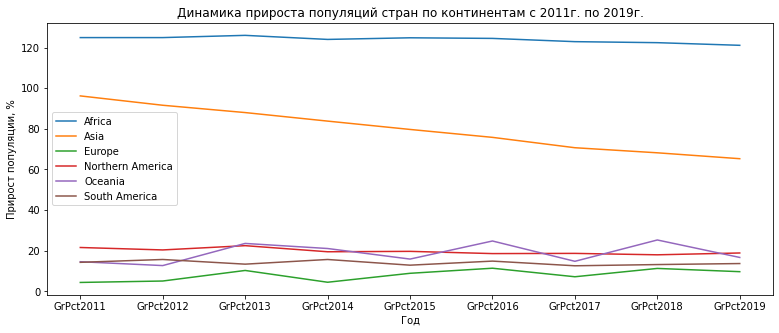

In [70]:
dynamics_growth_countries_continents_plot = dynamics_growth_countries_continents.iloc[0:-1, 0:-1]
for continent in dynamics_growth_countries_continents_plot.columns:
    plt.plot(dynamics_growth_countries_continents_plot.index, dynamics_growth_countries_continents_plot[continent])
plt.title('Динамика прироста популяций стран по континентам с 2011г. по 2019г.')
plt.xlabel('Год')
plt.ylabel('Прирост популяции, %') 
plt.legend(dynamics_growth_countries_continents_plot)

<AxesSubplot:title={'center':'Динамика '}, xlabel='Год', ylabel='Прирост популяции, %'>

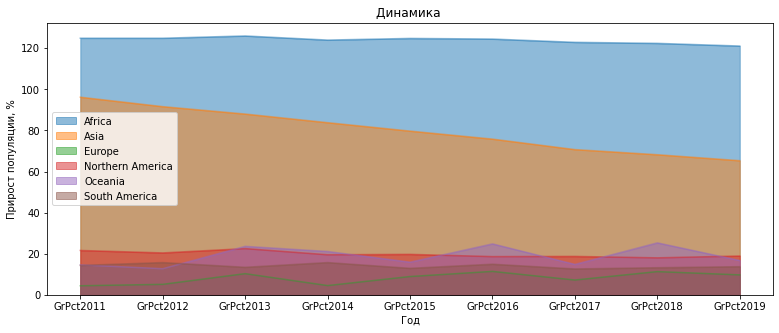

In [71]:
dynamics_growth_countries_continents.iloc[0:-1, 0:-1].plot(kind='area',
                             title='Динамика ', 
                             xlabel='Год', 
                             stacked=False,
                             ylabel='Прирост популяции, %')

<AxesSubplot:title={'center':'Динамика '}, xlabel='Год', ylabel='Прирост популяции, %'>

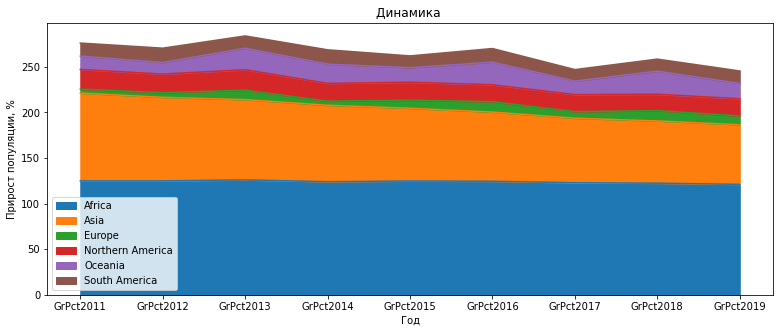

In [72]:
dynamics_growth_countries_continents.iloc[0:-1, 0:-1].plot(kind='area',
                             title='Динамика ', 
                             xlabel='Год', 
                             #stacked=False,
                             ylabel='Прирост популяции, %')

In [73]:
# Страны с максимальными результатами приростов населений на континентах в 2019г. (млн. человек)
countries_max_growths_on_continents = growth_countries[growth_countries.groupby('Continent').Growth_Pct\
                                                .transform(lambda x: x == x.max())].sort_values('Continent')
countries_max_growths_on_continents = countries_max_growths_on_continents\
                        [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
countries_max_growths_on_continents

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,Sub-Saharan Africa,0.412,0.055,43.6
127,Oman,سلطنة عُمان,OMN,Asia,Near East,1.934,0.259,63.6
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,0.113,0.015,22.3
56,Belize,Belize,BLZ,North America,Latin Amer. & Carib,0.068,0.009,21.1
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.003,0.000,30.0
94,Ecuador,Republica del Ecuador,ECU,South America,Latin Amer. & Carib,2.363,0.316,15.7


In [74]:
# Страны с минимальными результатами приростов населений на континентах в 2019г. (млн. человек)
countries_min_growths_on_continents = growth_countries[growth_countries.groupby('Continent').Growth_Pct\
                                                .transform(lambda x: x == x.min())].sort_values('Continent')
countries_min_growths_on_continents = countries_min_growths_on_continents\
                        [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
countries_min_growths_on_continents

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
161,Eritrea,دولة إرتريا,ERI,Africa,Sub-Saharan Africa,0.030,0.004,0.9
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574,-20.1
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,Eastern Europe,-0.404,-0.054,-10.9
55,Cuba,Republica de Cuba,CUB,North America,Latin Amer. & Carib,0.107,0.014,1.0
78,Tonga,Tonga,TON,Oceania,Oceania,0.000,0.000,0.0
83,Palau,Republic of Palau,PLW,Oceania,Oceania,0.000,0.000,0.0
90,Venezuela,Venezuela,VEN,South America,Latin Amer. & Carib,0.076,0.010,0.3


In [75]:
# Страны с максимальной динамикой прироста населения на континентах в 2019г. (млн. человек)
countries_max_dynamycs_growths_on_continents = growth_countries[growth_countries.groupby('Continent').GrPctTotal\
                                                .transform(lambda x: x == x.max())].sort_values('Continent')
countries_max_dynamycs_growths_on_continents = countries_max_dynamycs_growths_on_continents\
                        [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
countries_max_dynamycs_growths_on_continents

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,Sub-Saharan Africa,0.412,0.055,43.6
127,Oman,سلطنة عُمان,OMN,Asia,Near East,1.934,0.259,63.6
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,0.113,0.015,22.3
56,Belize,Belize,BLZ,North America,Latin Amer. & Carib,0.068,0.009,21.1
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.003,0.000,30.0
94,Ecuador,Republica del Ecuador,ECU,South America,Latin Amer. & Carib,2.363,0.316,15.7


In [76]:
# Страны с минимальной (отрицательной) динамикой прироста населения на континентах в 2019г. (млн. человек)
countries_min_dynamycs_growths_on_continents = growth_countries[growth_countries.groupby('Continent').GrPctTotal\
                                                .transform(lambda x: x == x.min())].sort_values('Continent')
countries_min_dynamycs_growths_on_continents = countries_min_dynamycs_growths_on_continents\
                        [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
countries_min_dynamycs_growths_on_continents

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
161,Eritrea,دولة إرتريا,ERI,Africa,Sub-Saharan Africa,0.030,0.004,0.9
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574,-20.1
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,Eastern Europe,-0.404,-0.054,-10.9
55,Cuba,Republica de Cuba,CUB,North America,Latin Amer. & Carib,0.107,0.014,1.0
78,Tonga,Tonga,TON,Oceania,Oceania,0.000,0.000,0.0
83,Palau,Republic of Palau,PLW,Oceania,Oceania,0.000,0.000,0.0
90,Venezuela,Venezuela,VEN,South America,Latin Amer. & Carib,0.076,0.010,0.3


<AxesSubplot:title={'center':'Growth Percent distribution'}, ylabel='Frequency'>

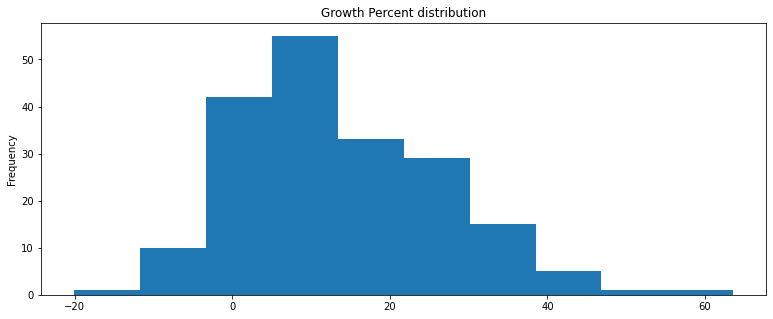

In [77]:
# Распределение показателей прироста стран
growth_countries['Growth_Pct'].plot(kind='hist', 
                                    title='Growth Percent distribution',
                                    xlabel='Growth_Pct',
                                    ylabel='Frequency')

In [78]:
asia

,Country,NativeName,Code,Continent,Region,Area
1,Japan,日本,JPN,Asia,Asia,978589.0
17,Turkey,Turkiye Cumhuriyeti,TUR,Asia,Near East,2021694.0
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,24856030.0
46,Azerbaijan,Azərbaycan Respublikası,AZE,Asia,C.W. Of Ind. States,224293.0
48,Cyprus,Κυπριακή Δημοκρατία,CYP,Asia,Near East,23957.0
49,Georgia,საქართველო,GEO,Asia,C.W. Of Ind. States,180522.0
50,Kazakhstan,Қазақстан Республикасы,KAZ,Asia,C.W. Of Ind. States,7037780.0
58,Indonesia,Republik Indonesia,IDN,Asia,Asia,4971330.0
61,Uzbekistan,Oʻzbekiston,UZB,Asia,C.W. Of Ind. States,1158762.0
63,Singapore,Republic of Singapore,SGP,Asia,Asia,1795.0


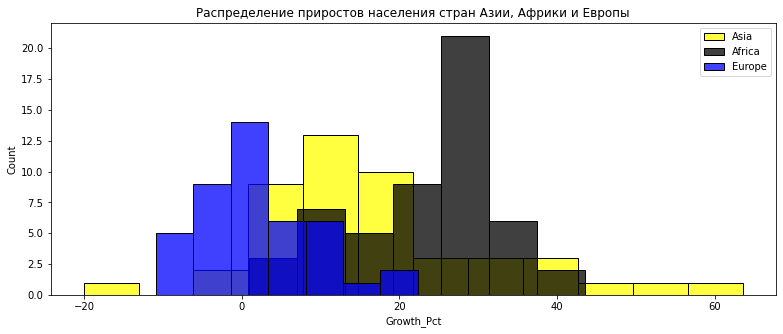

In [79]:
sns.histplot(growth_asia, x='Growth_Pct', color='yellow')
sns.histplot(growth_africa, x='Growth_Pct', color='black')
sns.histplot(growth_europe, x='Growth_Pct', color='blue')
#sns.histplot(growth_north_america, x='Growth_Pct', color='green')
#sns.histplot(growth_south_america, x='Growth_Pct', color='orange')
#sns.histplot(growth_oceania, x='Growth_Pct', color='brown')
plt.title('Распределение приростов населения стран Азии, Африки и Европы')
plt.legend(population_density_continents.index.unique())

<AxesSubplot:title={'center':'Growth Percent distribution'}>

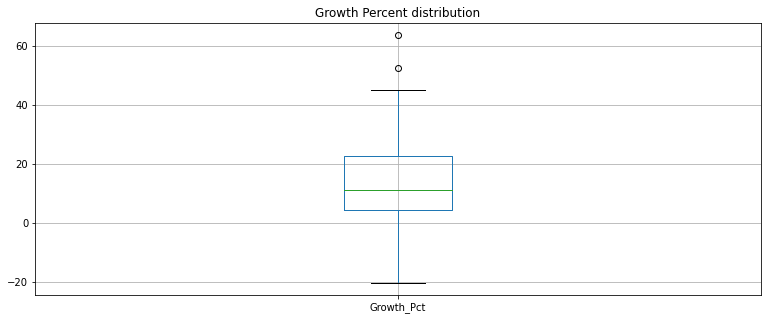

In [80]:
growth_countries['Growth_Pct'].plot(kind='box',
                                    title='Growth Percent distribution', grid=True)

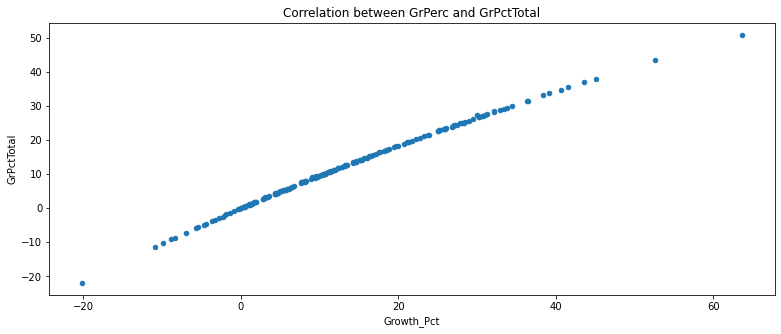

In [81]:
# Взаимосвязь показателей прироста в % (в рамках стран) и результата показателей динамики прироста в % 
growth_countries.plot(kind='scatter', 
                         x='Growth_Pct', 
                         y='GrPctTotal', 
                     title='Correlation between GrPerc and GrPctTotal')
plt.show()

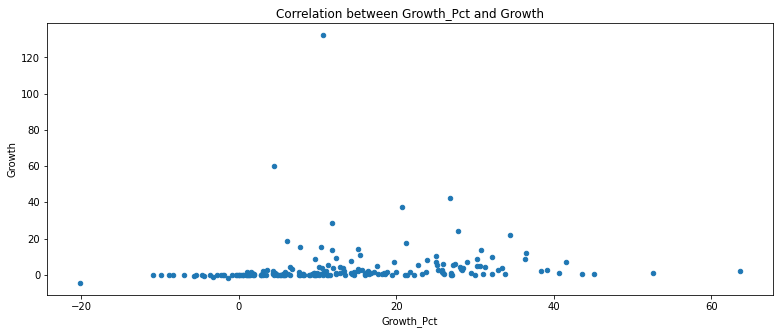

In [82]:
# Взаимосвязь показателей прироста в % (в рамках стран) и показателей прироста в млн. чел. (в рамках общей популяции)
growth_countries.plot(kind='scatter', 
                         x='Growth_Pct', 
                         y='Growth', 
                     title='Correlation between Growth_Pct and Growth')
plt.show()

<AxesSubplot:title={'center':'Correlation between Population and Growth'}, xlabel='Growth_Pct', ylabel='Growth'>

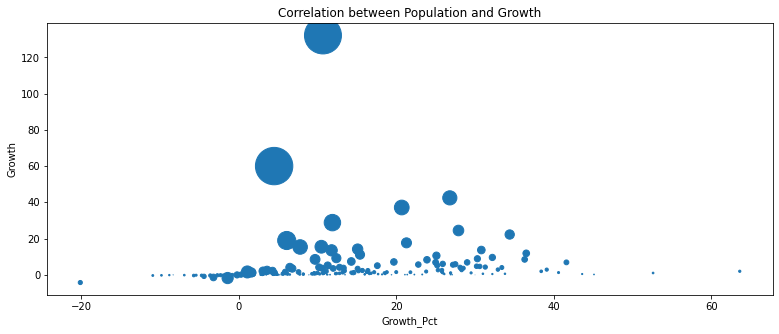

In [83]:
# Взаимосвязь показателей прироста в % (в рамках стран) и показателей прироста в млн. чел. (в рамках общей популяции)
# и общей популяции 
growth_countries.plot(kind='scatter', 
            x='Growth_Pct', 
            y='Growth',
            s='Population',# / 20,#*20,
            title='Correlation between Population and Growth')

In [84]:
# TOP-10 стран с наибольшими результатами приростов населения (в рамках страны) за период 2010-2019 г.г.
top10_max_growth_countries = growth_countries.sort_values('Growth_Pct', ascending=False).head(10)\
                          [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
top10_max_growth_countries

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
127,Oman,سلطنة عُمان,OMN,Asia,Near East,1.934,0.259,63.6
129,Qatar,قطر,QAT,Asia,Near East,0.976,0.130,52.6
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,Asia,0.165,0.022,45.1
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,Sub-Saharan Africa,0.412,0.055,43.6
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,6.847,0.915,41.6
120,Kuwait,الكويت,KWT,Asia,Near East,1.215,0.162,40.6
117,Jordan,الأردن,JOR,Asia,Near East,2.840,0.380,39.1
122,Lebanon,الجمهورية اللبنانية,LBN,Asia,Near East,1.903,0.254,38.4
181,Uganda,Uganda,UGA,Africa,Sub-Saharan Africa,11.842,1.583,36.5
142,Angola,Republica de Angola,AGO,Africa,Sub-Saharan Africa,8.469,1.132,36.3


In [85]:
# TOP-10 стран с наименьшими результатами приростов населения (с максимальнай убылью населения, в рамках страны) за период 2010-2019 г.г.
top10_min_growth_countries = growth_countries.sort_values('Growth_Pct', ascending=True).head(10)\
                          [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
top10_min_growth_countries

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574,-20.1
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,Eastern Europe,-0.404,-0.054,-10.9
12,Lithuania,Lietuva,LTU,Europe,Baltics,-0.303,-0.041,-9.8
34,Latvia,Latvija,LVA,Europe,Baltics,-0.184,-0.025,-8.8
47,Andorra,Andorra,AND,Europe,Western Europe,-0.007,-0.001,-8.3
39,Moldova,Republica Moldova,MDA,Europe,C.W. Of Ind. States,-0.198,-0.026,-6.9
41,Bulgaria,България,BGR,Europe,Eastern Europe,-0.420,-0.056,-5.7
44,Croatia,Republika Hrvatska,HRV,Europe,Eastern Europe,-0.230,-0.031,-5.4
67,Serbia,Србија,SRB,Europe,Eastern Europe,-0.346,-0.046,-4.7
40,Romania,Romania,ROU,Europe,Eastern Europe,-0.881,-0.118,-4.4


In [86]:
# Cтраны с естественной убылью населения (в рамках страны), за период 2010-2019 г.г.
countries_less_growth_ = growth_countries.loc[growth['Growth_Pct'] < 0].sort_values('Growth_Pct')\
                         [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]
countries_less_growth_

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
132,Syria,الجمهورية العربية السورية,SYR,Asia,Near East,-4.293,-0.574,-20.1
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,Eastern Europe,-0.404,-0.054,-10.9
12,Lithuania,Lietuva,LTU,Europe,Baltics,-0.303,-0.041,-9.8
34,Latvia,Latvija,LVA,Europe,Baltics,-0.184,-0.025,-8.8
47,Andorra,Andorra,AND,Europe,Western Europe,-0.007,-0.001,-8.3
39,Moldova,Republica Moldova,MDA,Europe,C.W. Of Ind. States,-0.198,-0.026,-6.9
41,Bulgaria,България,BGR,Europe,Eastern Europe,-0.420,-0.056,-5.7
44,Croatia,Republika Hrvatska,HRV,Europe,Eastern Europe,-0.230,-0.031,-5.4
67,Serbia,Србија,SRB,Europe,Eastern Europe,-0.346,-0.046,-4.7
40,Romania,Romania,ROU,Europe,Eastern Europe,-0.881,-0.118,-4.4


In [87]:
# Cтраны с естественной приростом населения выше среднеого значения (в рамках стран), за период 2010-2019 г.г.
countries_growth_more_mean = growth_countries.query('Growth_Pct > {}'.format(growth_countries['Growth_Pct'].mean()))\
                        [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Growth', 'Growth_Parts_Pct', 'Growth_Pct']]\
                        .sort_values('Growth_Pct', ascending=False)
countries_growth_more_mean

,Country,NativeName,Code,Continent,Region,Growth,Growth_Parts_Pct,Growth_Pct
127,Oman,سلطنة عُمان,OMN,Asia,Near East,1.934,0.259,63.6
129,Qatar,قطر,QAT,Asia,Near East,0.976,0.130,52.6
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,Asia,0.165,0.022,45.1
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,Sub-Saharan Africa,0.412,0.055,43.6
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,6.847,0.915,41.6
...,...,...,...,...,...,...,...,...
87,Kiribati,Ribaberiki ni Kiribati,KIR,Oceania,Oceania,0.015,0.002,14.6
96,Bolivia,Estado Plurinacional de Bolivia,BOL,South America,Latin Amer. & Carib,1.464,0.196,14.6
75,New Zealand,Aotearoa,NZL,Oceania,Oceania,0.628,0.084,14.4
59,South Africa,Suid-Afrika,ZAF,Africa,Sub-Saharan Africa,7.341,0.981,14.3


Text(0.5, 1.0, 'Correlation between Growth_Pct and Growth')

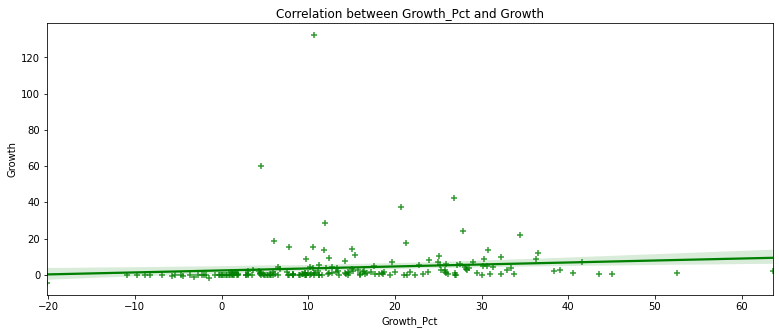

In [88]:
sns.regplot(data=growth, x='Growth_Pct', y='Growth', color='green', marker='+')
plt.title('Correlation between Growth_Pct and Growth')

## Отдельно выбранные страны

In [89]:
# Популяция Китая на 2019 г. и ее прирост за период 2010-2019 г.г.
population_china = population.loc[population.Country.str.contains('China')][['Country', 'NativeName', 'Code', 'Continent', 'Population']]
growth_china = growth.loc[growth.Country.str.contains('China')]
growth_china = growth_china[['Country', 'NativeName', 'Code', 'Continent', 'Growth', 'Growth_Pct']]
display(population_china)
display(growth_china)

,Country,NativeName,Code,Continent,Population
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715


,Country,NativeName,Code,Continent,Growth,Growth_Pct
27,People's Republic of China,中华人民共和国,CHN,Asia,60.01,4.5


In [90]:
# Популяция России на 2019 г. и ее прирост за период 2010-2019 г.г.
population_rus = population.loc[population.Country.str.contains('Russia')][['Country', 'NativeName', 'Code', 'Continent', 'Population']]
growth_russia = growth.loc[growth.Country.str.contains('Russia')]
growth_russia = growth_russia[['Country', 'NativeName', 'Code', 'Continent', 'Growth', 'Growth_Pct']]
display(population_rus)
display(growth_russia)

,Country,NativeName,Code,Continent,Population
29,Russia,Россия,RUS,Europe,144.406


,Country,NativeName,Code,Continent,Growth,Growth_Pct
29,Russia,Россия,RUS,Europe,1.557,1.1


In [91]:
# Популяция США на 2019 г. и ее прирост за период 2010-2019 г.г.
population_usa = population.loc[population.Country.str.contains('United States')][['Country', 'NativeName', 'Code', 'Continent', 'Population']]
growth_usa = growth.loc[growth.Country.str.contains('United States')]
population_growth_usa = population_usa.join(growth_usa[['Growth', 'Growth_Pct']], how='left')
population_growth_usa

,Country,NativeName,Code,Continent,Population,Growth,Growth_Pct
6,United States of America,United States of America,USA,North America,328.24,18.918,6.1


In [92]:
# Популяция Индии на 2019 г. и ее прирост за период 2010-2019 г.г. 
population_india = population.loc[population.Country.str.contains('India')][['Country', 'NativeName', 'Code', 'Continent', 'Population']]
growth_india = growth.loc[growth.Country.str.contains('India')]
population_growth_india = population_india.join(growth_india[['Growth', 'Growth_Pct']], how='left')
population_growth_india

,Country,NativeName,Code,Continent,Population,Growth,Growth_Pct
76,India,Republic of India,IND,Asia,1366.418,132.137,10.7


# II. Countries Of The World

<p style="align: left;"><img align=left src="https://cs8.pikabu.ru/post_img/2016/01/20/8/1453293321190915084.png"  width=630></p>

https://www.kaggle.com/fernandol/countries-of-the-world/version/1  

Coastline (coast / area ratio) - Береговая линия (отношение побережья к площади)  
Net migration - Чистая миграция  
Infant mortality (per 1000 births) - Младенческая смертность (на 1000 новорожденных)  
GDP (USD per capita) - ВВП (Дол. США на душу населения)  
Literacy (%) - Грамотность (%)  
Phones (per 1000) - Телефоны (на 1000 человек)  
Arable (%) - Пахотные (%)  
Crops (%) - Посевы (%)  
Other (%) - Другие (%)
Climate - Климат  
Birthrate - Уровень рождаемости
Deathrate - Уровень смертности
Agriculture - Сельское хозяйство  
Industry - Промышленность  
Service - Услуги

## ВВП

In [100]:
countries_world = full_df[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area', 'Population', 'Pop_Density',\
                           'GDP', 'Literacy', 'Phones', 'Net_Migration', 'Infant_Mortality', 'Birthrate', 'Deathrate',\
                           'Coastline', 'Climate', 'Arable', 'Crops', 'Other', 'Agriculture', 'Industry', 'Service']]
countries_world.head()

,Country,NativeName,Code,Continent,Region,Area,Population,Pop_Density,GDP,Literacy,...,Birthrate,Deathrate,Coastline,Climate,Arable,Crops,Other,Agriculture,Industry,Service
0,Canada,Canada,CAN,North America,Northern America,25860195.0,37.593,1.0,29800.0,97.0,...,10.78,7.80,2.02,NaN,4.96,0.02,95.02,0.022,0.294,0.684
1,Japan,日本,JPN,Asia,Asia,978589.0,126.265,129.0,28200.0,99.0,...,9.37,9.16,7.87,3.0,12.19,0.96,86.85,0.017,0.258,0.725
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,838644.0,5.348,6.0,37800.0,100.0,...,11.46,9.40,7.77,3.0,2.87,0.00,97.13,0.021,0.415,0.564
3,Ireland,Eire,IRL,Europe,Western Europe,182024.0,4.934,27.0,29600.0,98.0,...,14.45,7.82,2.06,3.0,15.20,0.03,84.77,0.050,0.460,0.490
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,240947.0,9.771,41.0,13900.0,99.4,...,9.72,13.11,0.00,3.0,50.09,2.06,47.85,0.037,0.312,0.651


In [94]:
# Страна с максимальным ВВП (долларов США на душу населения)
gdp_max = countries_world.query('GDP == {}'.format(countries_world['GDP'].max()))\
          [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
gdp_max

,Country,NativeName,Code,Continent,Region,GDP
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,55100.0


In [95]:
# Страна с минимальным ВВП (долларов США на душу населения)
gdp_min = countries_world.query('GDP == {}'.format(countries_world['GDP'].min()))\
          [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
gdp_min

,Country,NativeName,Code,Continent,Region,GDP
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,500.0
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,Sub-Saharan Africa,500.0


In [103]:
# Страны с максимальным ВВП по континентам (долларов США на душу населения)
countries_max_gdp_continents = countries_world[countries_world.groupby('Continent').GDP\
                                                .transform(lambda x: x == x.max())].sort_values('Continent')
countries_max_gdp_continents = countries_max_gdp_continents[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
countries_max_gdp_continents

,Country,NativeName,Code,Continent,Region,GDP
175,Mauritius,Republique de Maurice,MUS,Africa,Sub-Saharan Africa,11400.0
1,Japan,日本,JPN,Asia,Asia,28200.0
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,55100.0
6,United States of America,United States of America,USA,North America,Northern America,37800.0
68,Australia,Australia,AUS,Oceania,Oceania,29000.0
104,The Bahamas,Commonwealth of the Bahamas,BHS,South America,Latin Amer. & Carib,16700.0


In [104]:
# Страны с минимальным ВВП по континентам (долларов США на душу населения)
countries_min_gdp_continents = countries_world[countries_world.groupby('Continent').GDP\
                                                .transform(lambda x: x == x.min())].sort_values('Continent')
countries_min_gdp_continents = countries_min_gdp_continents[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
countries_min_gdp_continents

,Country,NativeName,Code,Continent,Region,GDP
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,500.0
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,Sub-Saharan Africa,500.0
139,Afghanistan,افغانستان,AFG,Asia,Asia,700.0
39,Moldova,Republica Moldova,MDA,Europe,C.W. Of Ind. States,1800.0
109,Haiti,Ayiti,HTI,North America,Latin Amer. & Carib,1600.0
87,Kiribati,Ribaberiki ni Kiribati,KIR,Oceania,Oceania,800.0
96,Bolivia,Estado Plurinacional de Bolivia,BOL,South America,Latin Amer. & Carib,2400.0


In [105]:
# TOP-10 стран с наибольшим ВВП
top10_max_gdp = countries_world.sort_values(by='GDP', ascending=False).head(10)\
                [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
top10_max_gdp

,Country,NativeName,Code,Continent,Region,GDP
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,55100.0
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,37800.0
6,United States of America,United States of America,USA,North America,Northern America,37800.0
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,Western Europe,34600.0
14,Switzerland,Schweizerische Eidgenossenschaft,CHE,Europe,Western Europe,32700.0
191,Danish Realm,Kongeriget Danmark,DNK,Europe,Western Europe,31100.0
32,Iceland,Island,ISL,Europe,Western Europe,30900.0
15,Austria,Republik Osterreich,AUT,Europe,Western Europe,30000.0
0,Canada,Canada,CAN,North America,Northern America,29800.0
3,Ireland,Eire,IRL,Europe,Western Europe,29600.0


In [106]:
# TOP-10 стран с наименьшим ВВП
top10_min_gdp = countries_world.sort_values(by='GDP', ascending=True).head(10)\
                [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
top10_min_gdp

,Country,NativeName,Code,Continent,Region,GDP
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,500.0
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,Sub-Saharan Africa,500.0
155,Burundi,Uburundi,BDI,Africa,Sub-Saharan Africa,600.0
145,Tanzania,Jamhuri ya Muungano wa Tanzania,TZA,Africa,Sub-Saharan Africa,600.0
173,Malawi,Republic of Malawi,MWI,Africa,Sub-Saharan Africa,600.0
139,Afghanistan,افغانستان,AFG,Asia,Asia,700.0
23,Ethiopia,ኢትዮጵያ,ETH,Africa,Sub-Saharan Africa,700.0
158,Democratic Republic of the Congo,Republique Democratique du Congo,COD,Africa,Sub-Saharan Africa,700.0
161,Eritrea,دولة إرتريا,ERI,Africa,Sub-Saharan Africa,700.0
156,Comoros,Union des Comores,COM,Africa,Sub-Saharan Africa,700.0


### Образованность населения Земли

In [107]:
# Страны с максимальным уровнем образованности населения
literacy_max = countries_world.query('Literacy == {}'.format(countries_world['Literacy'].max()))\
               [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
literacy_max

,Country,NativeName,Code,Continent,Region,Literacy
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,100.0
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,100.0
9,Finland,Suomi,FIN,Europe,Western Europe,100.0
47,Andorra,Andorra,AND,Europe,Western Europe,100.0
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,100.0
68,Australia,Australia,AUS,Oceania,Oceania,100.0
191,Danish Realm,Kongeriget Danmark,DNK,Europe,Western Europe,100.0


In [108]:
# Страна с минимальным уровнем образованности населения
literacy_min = countries_world.query('Literacy == {}'.format(countries_world['Literacy'].min()))\
               [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
literacy_min

,Country,NativeName,Code,Continent,Region,Literacy
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,17.6


In [109]:
# Страны с максимальным уровнем образованности населения по континентам
countries_max_literacy_continents = countries_world[countries_world.groupby('Continent').Literacy\
                                                .transform(lambda x: x == x.max())].sort_values('Continent')
countries_max_literacy_continents = countries_max_literacy_continents\
                                    [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
countries_max_literacy_continents

,Country,NativeName,Code,Continent,Region,Literacy
59,South Africa,Suid-Afrika,ZAF,Africa,Sub-Saharan Africa,86.4
133,Tajikistan,Ҷумҳурии Тоҷикистон,TJK,Asia,C.W. Of Ind. States,99.4
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,100.0
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,100.0
9,Finland,Suomi,FIN,Europe,Western Europe,100.0
47,Andorra,Andorra,AND,Europe,Western Europe,100.0
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,100.0
191,Danish Realm,Kongeriget Danmark,DNK,Europe,Western Europe,100.0
97,Trinidad and Tobago,Trinidad and Tobago,TTO,North America,Latin Amer. & Carib,98.6
68,Australia,Australia,AUS,Oceania,Oceania,100.0


In [110]:
# Страны с минимальным уровнем образованности населения по континентам
countries_min_literacy_continents = countries_world[countries_world.groupby('Continent').Literacy\
                                                .transform(lambda x: x == x.min())].sort_values('Continent')
countries_min_literacy_continents = countries_min_literacy_continents\
                                    [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
countries_min_literacy_continents

,Country,NativeName,Code,Continent,Region,Literacy
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,17.6
139,Afghanistan,افغانستان,AFG,Asia,Asia,36.0
43,Albania,Republika e Shqiperise,ALB,Europe,Eastern Europe,86.5
109,Haiti,Ayiti,HTI,North America,Latin Amer. & Carib,52.9
81,Vanuatu,Ripablik blong Vanuatu,VUT,Oceania,Oceania,53.0
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,86.4


In [111]:
# TOP-10 стран с наименьшим уровнем образованности
top10_min_literacy = countries_world.sort_values(by='Literacy', ascending=True).head(10)\
                     [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
top10_min_literacy

,Country,NativeName,Code,Continent,Region,Literacy
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,17.6
154,Burkina Faso,Burkina Faso,BFA,Africa,Sub-Saharan Africa,26.6
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,31.4
164,Guinea,Republique de Guinee,GIN,Africa,Sub-Saharan Africa,35.9
139,Afghanistan,افغانستان,AFG,Asia,Asia,36.0
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,Sub-Saharan Africa,37.8
163,The Gambia,Republic of The Gambia,GMB,Africa,Sub-Saharan Africa,40.1
184,Senegal,Senegaal,SEN,Africa,Sub-Saharan Africa,40.2
112,Iraq,العراق,IRQ,Asia,Near East,40.4
152,Benin,Benin,BEN,Africa,Sub-Saharan Africa,40.9


In [112]:
# Средний уровень образованности по миру
average_literacy = round(countries_world['Literacy'].mean(), 1)
print(f"Среднее значение уровня образованности по миру: {average_literacy}")

Среднее значение уровня образованности по миру: 81.4


In [113]:
# Страны с уровнем образованности меньше среднего по миру
less_average = countries_world.query('Literacy < {}'.format(countries_world['Literacy'].mean()))\
               [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']].sort_values('Literacy', ascending=True)
less_average

,Country,NativeName,Code,Continent,Region,Literacy
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,17.6
154,Burkina Faso,Burkina Faso,BFA,Africa,Sub-Saharan Africa,26.6
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,31.4
164,Guinea,Republique de Guinee,GIN,Africa,Sub-Saharan Africa,35.9
139,Afghanistan,افغانستان,AFG,Asia,Asia,36.0
...,...,...,...,...,...,...
183,Sao Tome and Principe,Republica Democratica de Sao Tome e Principe,STP,Africa,Sub-Saharan Africa,79.3
111,Iran,ایران,IRN,Asia,Asia,79.4
153,Botswana,Botswana,BWA,Africa,Sub-Saharan Africa,79.8
110,El Salvador,El Salvador,SLV,North America,Latin Amer. & Carib,80.2


In [114]:
# Распределение стран с уровнем образованности меньше среднего по континентам
count_less_average_continent = less_average.groupby('Continent').count().reset_index()[['Continent', 'Country']]
count_less_average_continent

,Continent,Country
0,Africa,43
1,Asia,15
2,North America,6
3,Oceania,2


In [115]:
# Страны в Северной Америке с уровнем образованности меньше среднего
less_average.loc[(less_average.Continent == ('North America')) & (less_average.Literacy < average_literacy)]

,Country,NativeName,Code,Continent,Region,Literacy
109,Haiti,Ayiti,HTI,North America,Latin Amer. & Carib,52.9
99,Saint Lucia,Saint Lucia,LCA,North America,Latin Amer. & Carib,67.0
118,Nicaragua,Republica de Nicaragua,NIC,North America,Latin Amer. & Carib,67.5
103,Guatemala,Guatemala,GTM,North America,Latin Amer. & Carib,70.6
106,Honduras,Republica de Honduras,HND,North America,Latin Amer. & Carib,76.2
110,El Salvador,El Salvador,SLV,North America,Latin Amer. & Carib,80.2


In [116]:
# Количество и доля населения в мире с уровнем образованности ниже среднего
count_population_less_average = countries_world.query('Literacy < {}'.format(countries_world['Literacy'].mean()))\
                                [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy', 'Population']]\
                                .sort_values('Literacy', ascending=True)

print(f"Количество людей с уровнем образованности ниже среднего: {round(count_population_less_average.Population.sum(), 1)} млн. чел.")
print(f"Доля населения Земли с уровнем образованности ниже среднего: {round(count_population_less_average.Population.sum() / countries_world.Population.sum() * 100)} %")

Количество людей с уровнем образованности ниже среднего: 3263.1 млн. чел.
Доля населения Земли с уровнем образованности ниже среднего: 43 %


In [118]:
countries_average_literacy = countries_world[['Country', 'Continent', 'Literacy', 'Population']]
countries_average_literacy['LevelLiteracy'] = countries_average_literacy['Literacy'].apply(lambda x: 'Less average' if x < average_literacy else 'More then average')
countries_average_literacy.head()

<ipython-input-118-26ec9d2e8d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_average_literacy['LevelLiteracy'] = countries_average_literacy['Literacy'].apply(lambda x: 'Less average' if x < average_literacy else 'More then average')


,Country,Continent,Literacy,Population,LevelLiteracy
0,Canada,North America,97.0,37.593,More then average
1,Japan,Asia,99.0,126.265,More then average
2,Norway,Europe,100.0,5.348,More then average
3,Ireland,Europe,98.0,4.934,More then average
4,Hungary,Europe,99.4,9.771,More then average


,Population,Country,PopulationPerc,CountryPerc
LevelLiteracy,,,,
Less average,3263.076,66,42.8,34.4
More then average,4352.348,126,57.2,65.6


array([<AxesSubplot:ylabel='PopulationPerc'>,
       <AxesSubplot:ylabel='CountryPerc'>], dtype=object)

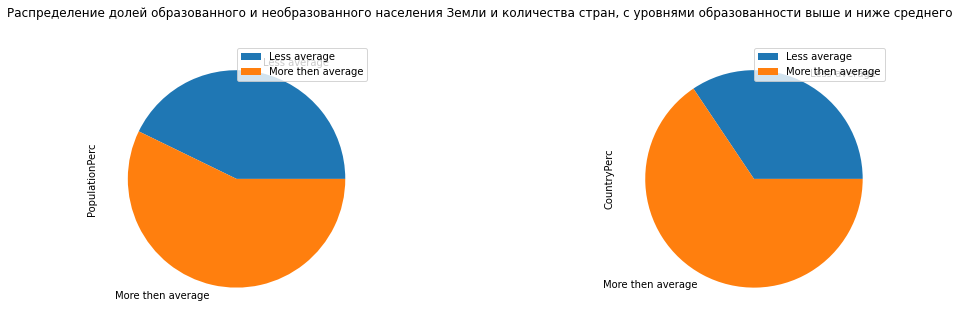

In [119]:
groupby_literacy = countries_average_literacy.groupby('LevelLiteracy').agg({'Population': 'sum', 'Country': 'count'}).reset_index()
groupby_literacy['PopulationPerc'] = round(groupby_literacy.Population / groupby_literacy.Population.sum() * 100, 1)
groupby_literacy['CountryPerc'] = round(groupby_literacy.Country / groupby_literacy.Country.sum() * 100, 1)
groupby_literacy.index = groupby_literacy.LevelLiteracy
groupby_literacy.drop(groupby_literacy.columns[[0]], axis=1, inplace=True)
display(groupby_literacy)
groupby_literacy[['PopulationPerc', 'CountryPerc']].plot.pie(subplots=True, figsize=(17, 5),\
    title='Распределение долей образованного и необразованного населения Земли и количества стран, с уровнями образованности выше и ниже среднего',\
    legend=True)

,Literacy
count,181.000000
mean,81.438122
std,20.375853
min,17.600000
25%,68.900000
50%,90.900000
75%,98.000000
max,100.000000


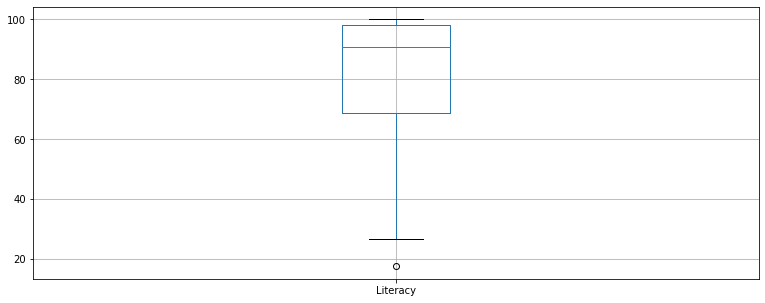

In [120]:
literacy_by_continent = countries_world[['Continent', 'Literacy']]
display(pd.DataFrame(literacy_by_continent.Literacy.describe()))
boxplot_literacy_by_continent = literacy_by_continent.boxplot(column=['Literacy'])

Continent,Africa,Asia,Europe,North America,Oceania,South America
count,52.000000,45.000000,39.000000,20.000000,10.00000,15.000000
mean,61.251923,82.211111,98.307692,86.595000,88.32000,93.773333
std,17.978129,19.368944,2.678608,13.211338,16.21267,3.622838
min,17.600000,36.000000,86.500000,52.900000,53.00000,86.400000
25%,47.225000,76.900000,98.200000,79.200000,89.75000,92.500000
50%,61.900000,90.300000,99.000000,92.400000,93.70000,94.000000
75%,78.400000,97.200000,99.800000,97.000000,98.87500,96.600000
max,86.400000,99.400000,100.000000,98.600000,100.00000,98.800000


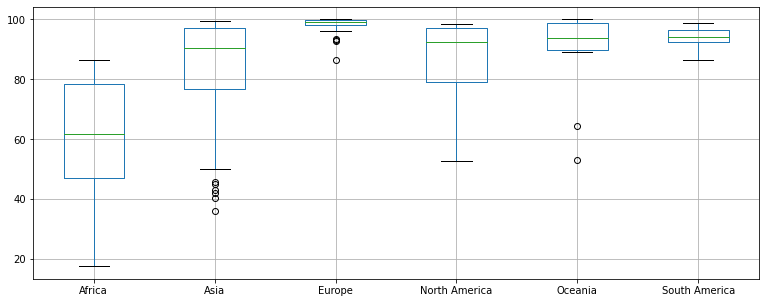

In [121]:
pivot_literacy = pd.DataFrame(literacy_by_continent.pivot(columns = 'Continent',\
                                        values = 'Literacy').reset_index())
pivot_literacy.drop(pivot_literacy.columns[[0]], axis=1, inplace=True)
display(pd.DataFrame(pivot_literacy.describe()))
boxplot_pivot_literacy = pivot_literacy.boxplot(column=['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

<AxesSubplot:title={'center':'Literacy distribution'}, ylabel='Frequency'>

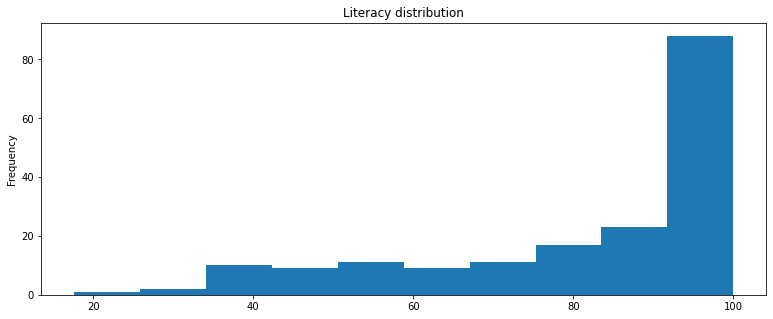

In [122]:
# Распределение показателей образованности населения Земли
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world['Literacy'].plot(kind='hist', 
                                title='Literacy distribution',
                               xlabel='Literacy',
                               ylabel='Frequency')

<AxesSubplot:title={'center':'GDP distribution'}, ylabel='Frequency'>

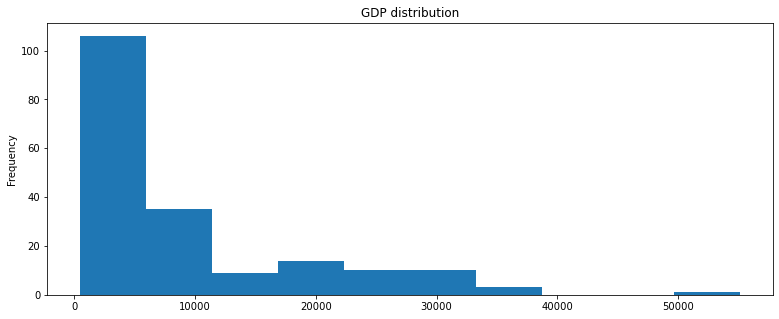

In [123]:
# Распределение показателей ВВП
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world['GDP'].plot(kind='hist', 
                                title='GDP distribution',
                               xlabel='GDP',
                               ylabel='Frequency')

C:\Users\GRALEX\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:title={'center':'Literacy & GDP distribution'}, ylabel='Frequency'>

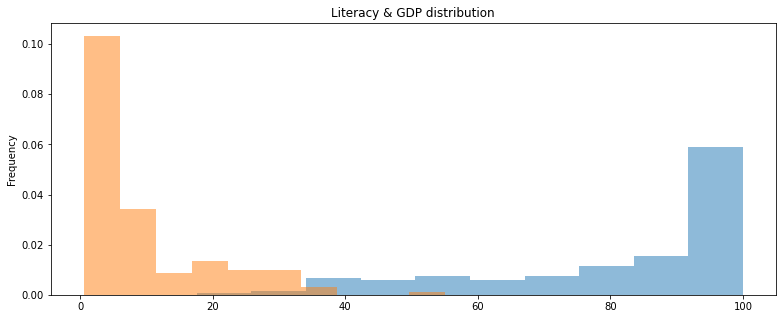

In [124]:
# сравнение распределения показателей образованности населения и ВВП
df_hist_lit_gdp = countries_world[['Country', 'GDP', 'Literacy']]
df_hist_lit_gdp.loc[:, 'GDP'] = df_hist_lit_gdp['GDP'] / 1000

#sns.set(rc={'figure.figsize':(12.0,5.5)})
df_hist_lit_gdp.Literacy.plot(kind='hist', 
                         title='Literacy & GDP distribution',
                         xlabel='Literacy',
                         ylabel='Frequency',
                         alpha = 0.5,
                         density = True)

df_hist_lit_gdp.GDP.plot(kind='hist', 
                        title='Literacy & GDP distribution',
                        xlabel='GDP',
                        ylabel='Frequency',
                        alpha = 0.5,
                        density = True)

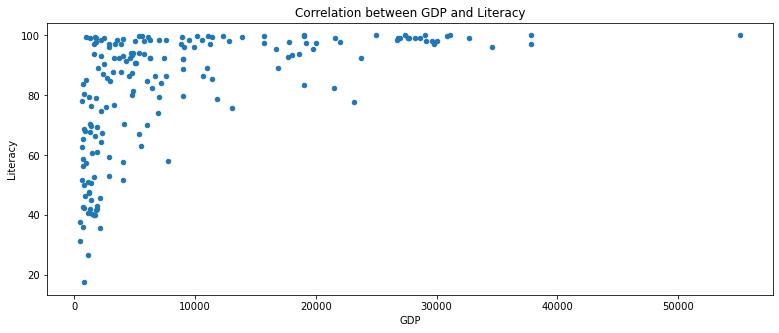

In [125]:
# Взаимосвязь показателей ВВП (дол. США на душу населения) и показателей уровня образованности населения
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world.plot(kind='scatter', 
                        x='GDP', 
                        y='Literacy', 
                    title='Correlation between GDP and Literacy')
plt.show()

<AxesSubplot:title={'center':'Correlation between GDP and Literacy and Population'}, xlabel='GDP', ylabel='Literacy'>

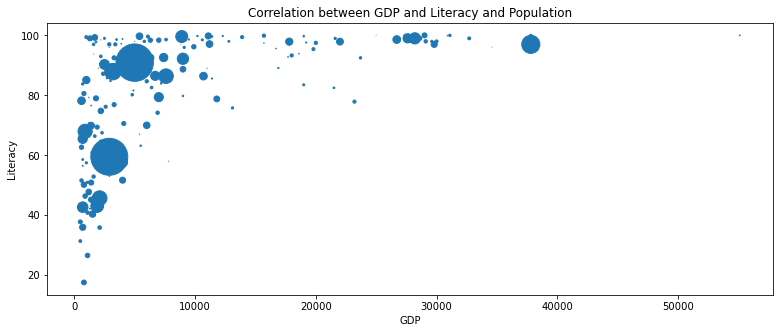

In [126]:
# Взаимосвязь показателей ВВП (дол. США на душу населения) и показателей уровня образованности населения и общей популяции 
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world.plot(kind='scatter', 
                        x='GDP', 
                        y='Literacy',
                        s='Population',# / 20,#*20,
                    title='Correlation between GDP and Literacy and Population')

<AxesSubplot:>

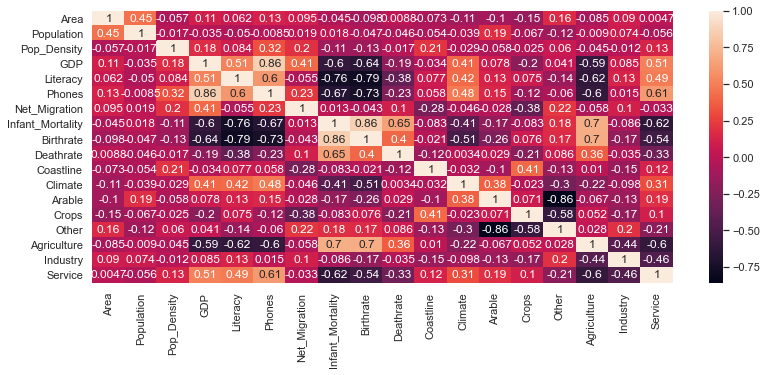

In [132]:
#sns.set(rc={'figure.figsize':(20.0,10.0)})
sns.heatmap(countries_world.corr(), annot=True)

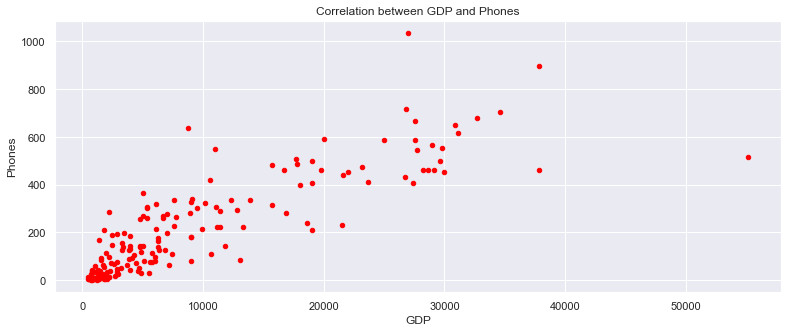

In [133]:
# Взаимосвязь показателей ВВП (дол. США на душу населения) и показателем уровня обеспеченности телефонной связью
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world.plot(kind='scatter', 
                        x='GDP', 
                        y='Phones', 
                    title='Correlation between GDP and Phones',
                    color='red')
plt.show()

Text(0.5, 1.0, 'Correlation between GDP and Phones')

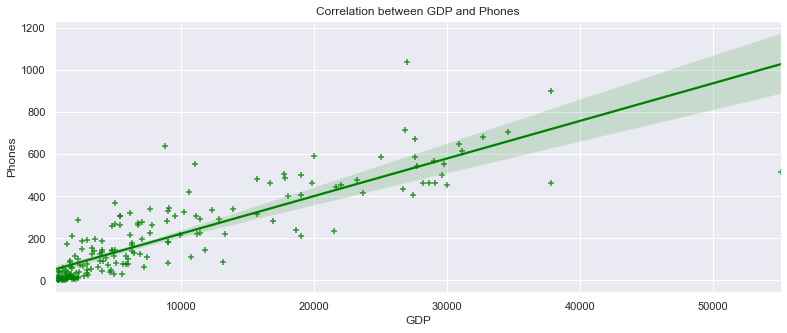

In [134]:
#sns.set(rc={'figure.figsize':(12.0,5.5)})
sns.regplot(data=countries_world, x='GDP', y='Phones', color='green', marker='+')
plt.title('Correlation between GDP and Phones')

### Береговая линия, как отношение побережья к площади

In [53]:
# Страна с максимальной береговой линией
coastline_max = countries_world.query('Coastline == {}'.format(countries_world['Coastline'].max()))[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Coastline']]
coastline_max

,Country,NativeName,Code,Continent,Region,Coastline
85,Federated States of Micronesia,Federated States of Micronesia,FSM,Oceania,Oceania,870.66


In [55]:
# Страны без береговой линии
coastline_min = countries_world.query('Coastline == {}'.format(countries_world['Coastline'].min()))[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Coastline']]
coastline_min.head()

,Country,NativeName,Code,Continent,Region,Coastline
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,0.0
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,0.0
14,Switzerland,Schweizerische Eidgenossenschaft,CHE,Europe,Western Europe,0.0
15,Austria,Republik Osterreich,AUT,Europe,Western Europe,0.0
23,Ethiopia,ኢትዮጵያ,ETH,Africa,Sub-Saharan Africa,0.0


In [56]:
# Страны с максимальной береговой линией по континентам
series_index_max_coastline_continents = countries_world.groupby('Continent').idxmax()['Coastline']
countries_max_coastline_continents = countries_world.loc[countries_world.index.isin(series_index_max_coastline_continents)]\
                                                      .sort_values(by='Coastline', ascending=False)
countries_max_coastline_continents = countries_max_coastline_continents[['Country', 'NativeName', 'Code', 'Continent', 'Coastline']]
countries_max_coastline_continents

,Country,NativeName,Code,Continent,Coastline
85,Federated States of Micronesia,Federated States of Micronesia,FSM,Oceania,870.66
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,214.67
52,Monaco,Principaute de Monaco,MCO,Europe,205.00
185,Seychelles,Republique des Seychelles,SYC,Africa,107.91
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,51.72
102,Grenada,Grenada,GRD,North America,35.17
